# Машинное обучение, ФКН ВШЭ

## Практическое задание 2. Exploratory Data Analysis и линейная регрессия

### Общая информация
Дата выдачи: 05.10.2023

Мягкий дедлайн: 23:59MSK 18.10.2023

Жесткий дедлайн: 23:59MSK 22.10.2022

### О задании
В этом задании мы попытаемся научиться анализировать данные и выделять из них полезные признаки. Мы также научимся пользоваться `seaborn` и `sklearn`, а заодно привыкнем к основным понятиям машинного обучения.

### Оценивание и штрафы
Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 10 баллов. Проверяющий имеет право снизить оценку за неэффективную реализацию или неопрятные графики.

**Обратите внимание**, что в каждом разделе домашнего задания есть оцениваниемые задачи и есть вопросы. Вопросы дополняют задачи и направлены на то, чтобы проинтерпретировать или обосновать происходящее. Код без интерпретации не имеет смысла, поэтому отвечать на вопросы обязательно — за отсутствие ответов мы будем снижать баллы за задачи. Если вы ответите на вопросы, но не напишете корректный код к соответствующим оцениваемым задачам, то баллы за такое выставлены не будут.

Сдавать задание после указанного срока сдачи нельзя. При выставлении неполного балла за задание в связи с наличием ошибок на усмотрение проверяющего предусмотрена возможность исправить работу на указанных в ответном письме условиях.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов (подробнее о плагиате см. на странице курса). Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

### Формат сдачи
Задания сдаются через систему Anytask. Инвайт можно найти на странице курса. Присылать необходимо ноутбук с выполненным заданием. Сам ноутбук называйте в формате homework-practice-02-linregr-Username.ipynb, где Username — ваша фамилия.

Для удобства проверки самостоятельно посчитайте свою максимальную оценку (исходя из набора решенных задач) и укажите ниже.

Оценка: 10

В этом ноутбуке используется библиотека `folium` для визуализации карт. Она работает в google colab!

In [219]:
!pip install folium

In [220]:
import folium

m = folium.Map(location=(55.7522200, 37.6155600), zoom_start=10)

m

Если вы всё сделали правильно, то выше должна открыться карта Москвы.

In [221]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

sns.set(style="darkgrid")

np.random.seed(0)

## Часть 0. Подготовка (1 балл)

**Задание 1 (1 балл)**. Мы будем работать с данными из соревнования [New York City Taxi Trip Duration](https://www.kaggle.com/c/nyc-taxi-trip-duration/overview), в котором нужно было предсказать длительность поездки на такси. Скачайте обучающую выборку из этого соревнования и загрузите ее:

In [222]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [223]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

train_df = pd.read_csv('/content/drive/MyDrive/train.csv')
print(train_df.shape[0])
train_df.head(5)

1458644


id  vendor_id      pickup_datetime     dropoff_datetime  \
0  id2875421          2  2016-03-14 17:24:55  2016-03-14 17:32:30   
1  id2377394          1  2016-06-12 00:43:35  2016-06-12 00:54:38   
2  id3858529          2  2016-01-19 11:35:24  2016-01-19 12:10:48   
3  id3504673          2  2016-04-06 19:32:31  2016-04-06 19:39:40   
4  id2181028          2  2016-03-26 13:30:55  2016-03-26 13:38:10   

   passenger_count  pickup_longitude  pickup_latitude  dropoff_longitude  \
0                1        -73.982155        40.767937         -73.964630   
1                1        -73.980415        40.738564         -73.999481   
2                1        -73.979027        40.763939         -74.005333   
3                1        -74.010040        40.719971         -74.012268   
4                1        -73.973053        40.793209         -73.972923   

   dropoff_latitude store_and_fwd_flag  trip_duration  
0         40.765602                  N            455  
1         40.731152                  N            663  
2         40.710087                  N           2124  
3         40.706718                  N            429  
4         40.782520                  N            435

In [224]:
pd.isna(train_df).sum()

id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
dtype: int64

Обратите внимание на колонки `pickup_datetime` и `dropoff_datetime`. `dropoff_datetime` был добавлена организаторами только в обучающую выборку, то есть использовать эту колонку нельзя, давайте удалим ее. В `pickup_datetime` записаны дата и время начала поездки. Чтобы с ней было удобно работать, давайте преобразуем даты в `datetime`-объекты

In [225]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
train_df = train_df.drop(['dropoff_datetime'], axis=1)
train_df['pickup_datetime'] = pd.to_datetime(train_df['pickup_datetime'])

В колонке `trip_duration` записано целевое значение, которое мы хотим предсказывать. Давайте посмотрим на распределение таргета в обучающей выборке. Для этого нарисуйте его гистограмму:

<Figure size 300x300 with 0 Axes>

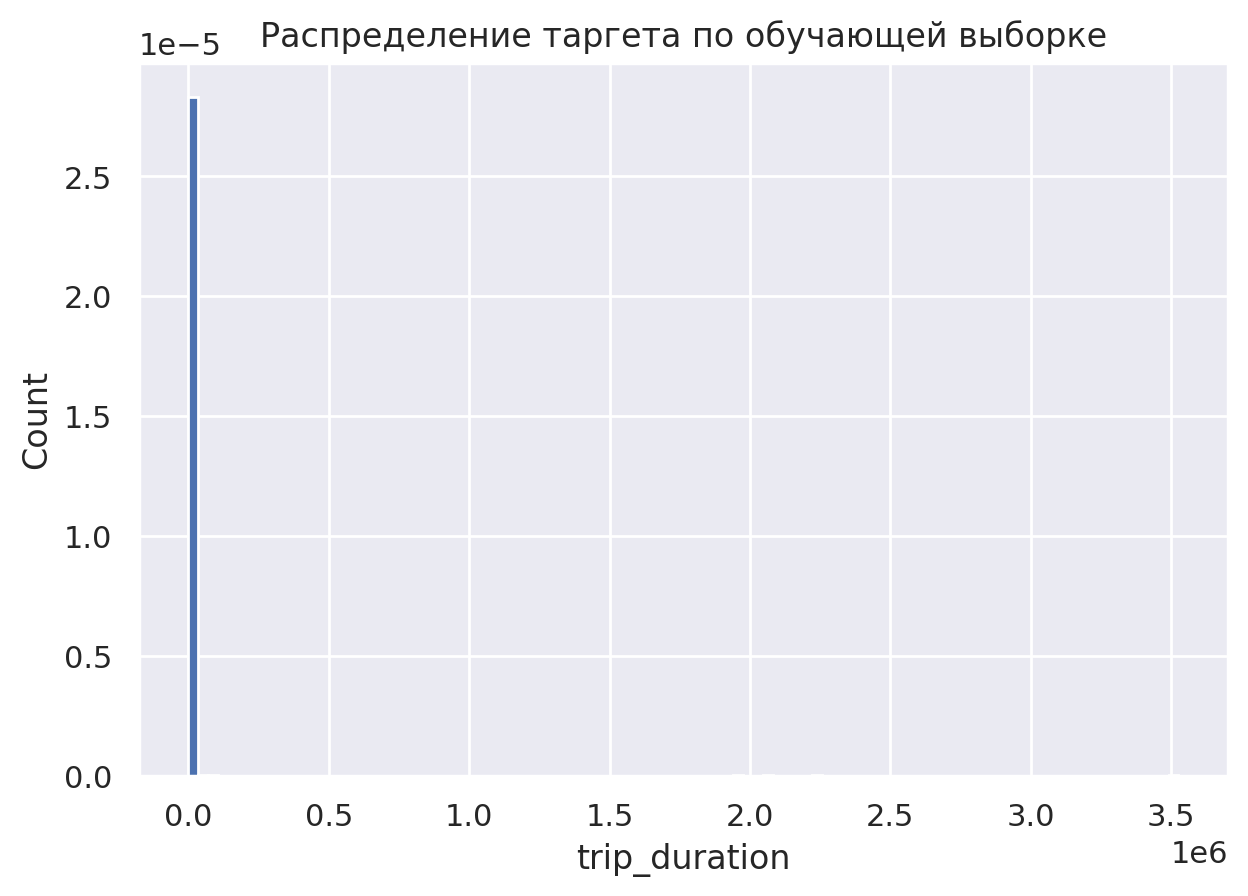

In [226]:
plt.figure(figsize=(3, 3))
fig, ax = plt.subplots(1, 1, sharey=True, tight_layout=True)

plt.hist(train_df["trip_duration"], bins=100, density = True)
plt.title("Распределение таргета по обучающей выборке")
plt.ylabel("Count")
plt.xlabel("trip_duration")
plt.show()

<Figure size 500x500 with 0 Axes>

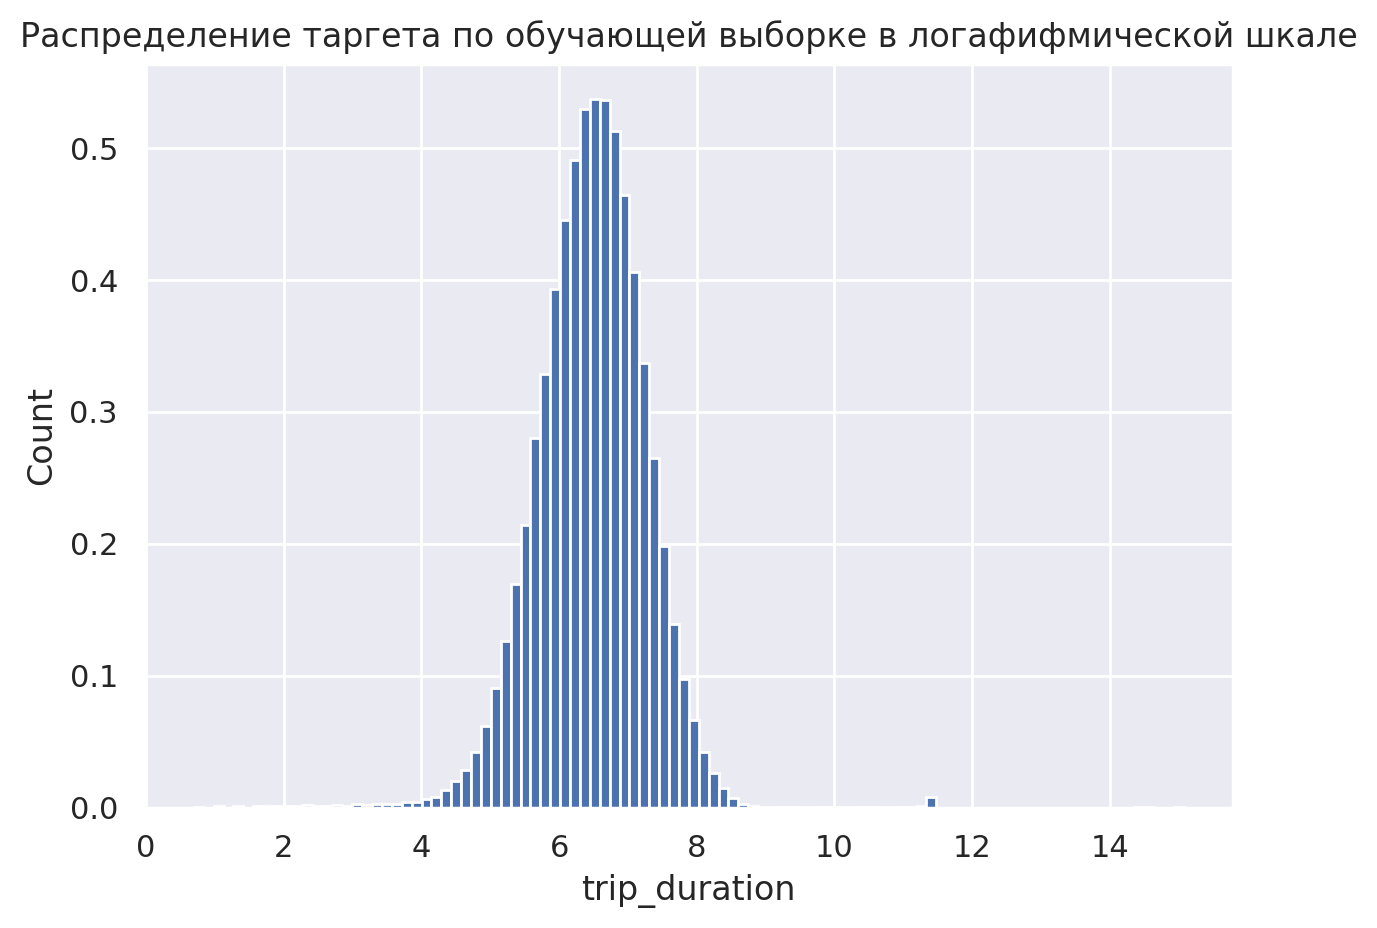

In [227]:
plt.figure(figsize=(5, 5))
fig, ax = plt.subplots(1, 1, sharey=True, tight_layout=True)

plt.hist(np.log1p(train_df["trip_duration"]), bins=100, density = True)
plt.title("Распределение таргета по обучающей выборке в логафифмической шкале")
plt.ylabel("Count")
plt.xlabel("trip_duration")
plt.show()

**Вопрос**: Что можно сказать о целевой переменной по гистограмме её значений?

Целевая переменная неотрицательна и есть вбросы с очень длинными поездками

В соревновании в качестве метрики качества использовалось RMSLE:
$$\text{RMSLE}(X, y, a) = \sqrt{\frac{1}{\ell}\sum_{i=1}^{\ell} \big(\log{(y_i + 1)} - \log{(a(x_i) + 1)}\big)^2}$$

**Вопрос**: Как вы думаете, почему авторы соревнования выбрали именно RMSLE, а не RMSE?

Целевая переменная неотрицательна, так что она подходит, авторы скорее хотели штрафовать за порядок велечин, а не за их значение, за заниженные прогнозы больше, чем за завышенные

На семинаре мы рассматривали несколько моделей линейной регрессии в `sklearn`, но каждая из них оптимизировала среднеквадратичную ошибку (MSE), а не RMSLE. Давайте проделаем следующий трюк: будем предсказывать не целевую переменную, а ее *логарифм*. Обозначим $\hat{y}_i = \log{(y_i + 1)}$ — модифицированный таргет, а $\hat{a}(x_i)$ — предсказание модели, которая обучалась на $\hat{y}_i$, то есть логарифм таргета. Чтобы предсказать исходное значение, мы можем просто взять экспоненту от нашего предсказания: $a(x_i) = \exp(\hat{a}(x_i)) - 1$.

**Вопрос**: Покажите, что оптимизация RMSLE для модели $a$ эквивалентна оптимизации MSE для модели $\hat{a}$.

**Доказательство**: $$\text{RMSLE}(X, y, a) = \sqrt{\frac{1}{\ell}\sum_{i=1}^{\ell} \big(\log{(y_i + 1)} - \log{(a(x_i) + 1)}\big)^2} =  \sqrt{\frac{1}{\ell}\sum_{i=1}^{\ell} \big(\hat{y}_i - \hat{a}_i)^2} = \text{RMSE}(X,\hat{a})$$

оптимизация RMSE эквивалентно оптимизации MSE

Итак, мы смогли свести задачу оптимизации RMSLE к задаче оптимизации MSE, которую мы умеем решать! Кроме того, у логарифмирования таргета есть еще одно полезное свойство. Чтобы его увидеть, добавьте к нашей выборке колонку `log_trip_duration` (воспользуйтесь `np.log1p`) и нарисуйте гистограмму модифицированного таргета по обучающей выборке. Удалите колонку со старым таргетом.

In [228]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
train_df['log_trip_duration'] = np.log1p(train_df['trip_duration'])


<Figure size 500x500 with 0 Axes>

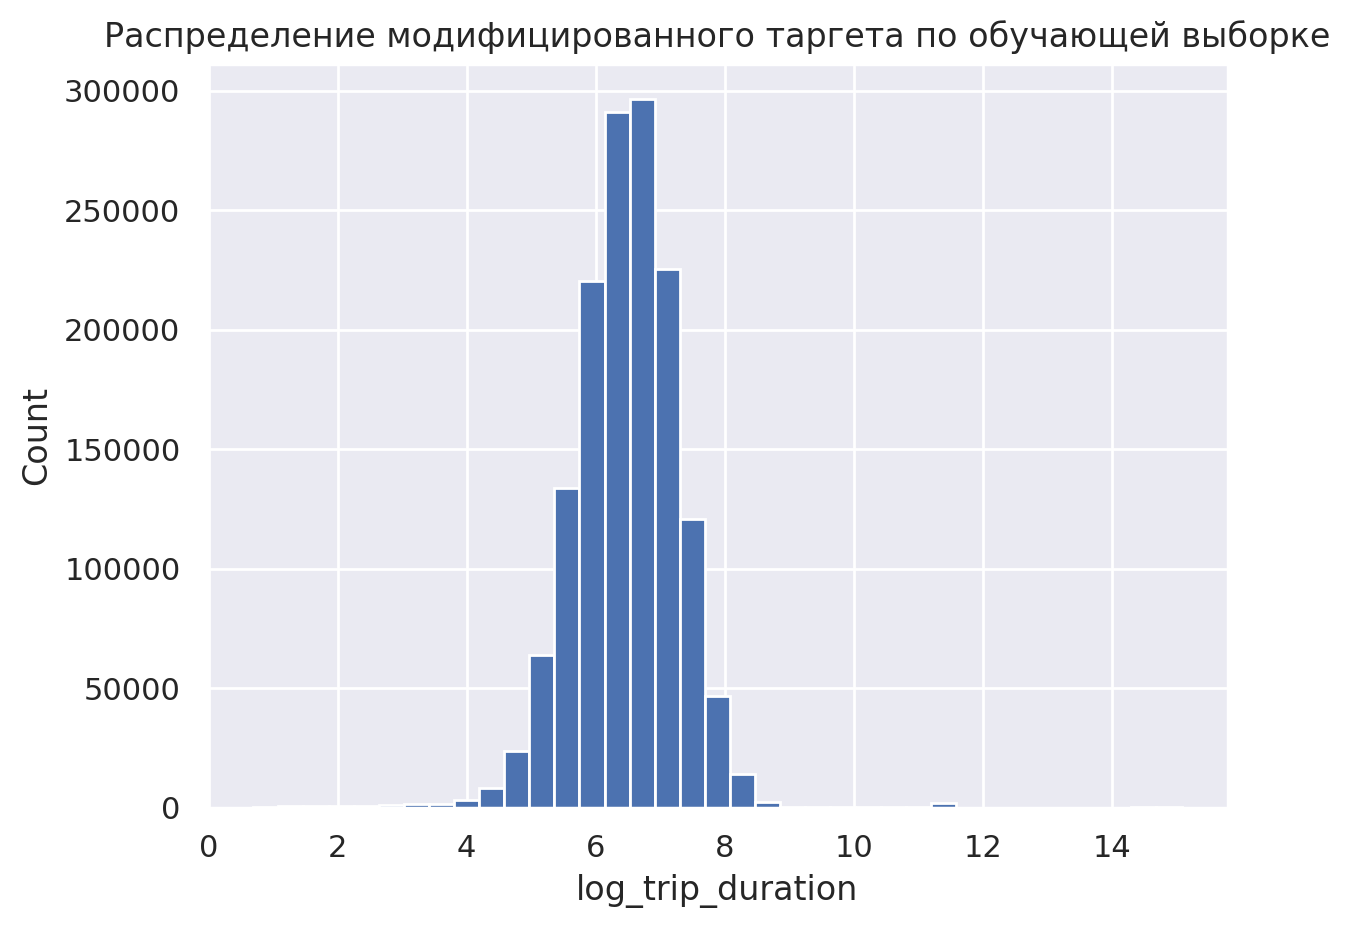

In [229]:
plt.figure(figsize=(5, 5))
fig, ax = plt.subplots(1, 1, sharey=True, tight_layout=True)

# We can set the number of bins with the *bins* keyword argument.
ax.hist(train_df["log_trip_duration"], bins=37)
plt.title("Распределение модифицированного таргета по обучающей выборке")
plt.ylabel("Count")
plt.xlabel("log_trip_duration")
plt.show()

Чтобы иметь некоторую точку отсчета, давайте посчитаем значение метрики при наилучшем константном предсказании:

In [230]:
from sklearn.metrics import mean_squared_error


def rmsle(log1p_y_true, log1p_y_pred):
    return mean_squared_error(log1p_y_true, log1p_y_pred, squared=False)

len_train = train_df["log_trip_duration"].shape[0]
const_pred = train_df["log_trip_duration"].mean()
# print( train_df['log_trip_duration'].mean())
# print(train_df['log_trip_duration'].shape[0])

rmsle_best_const = rmsle(train_df["log_trip_duration"], np.full([len_train], const_pred))
print(rmsle_best_const)
assert np.allclose(rmsle_best_const, 0.79575, 1e-4)

0.7957592365411509


## Часть 1. Изучаем `pickup_datetime` (2 балла)

**Задание 2 (0.25 баллов)**. Для начала давайте посмотрим, сколько всего было поездок в каждый из дней. Постройте график зависимости количества поездок от дня в году (например, можно воспользоваться `sns.countplot`):

In [231]:
copy_data_days = train_df[['pickup_datetime']].copy()
copy_data_days['pickup_datetime'] = copy_data_days['pickup_datetime'].dt.date
copy_data_days = copy_data_days.sort_values(by = 'pickup_datetime')
copy_data_days.head(3)

pickup_datetime
333752       2016-01-01
616306       2016-01-01
1391034      2016-01-01

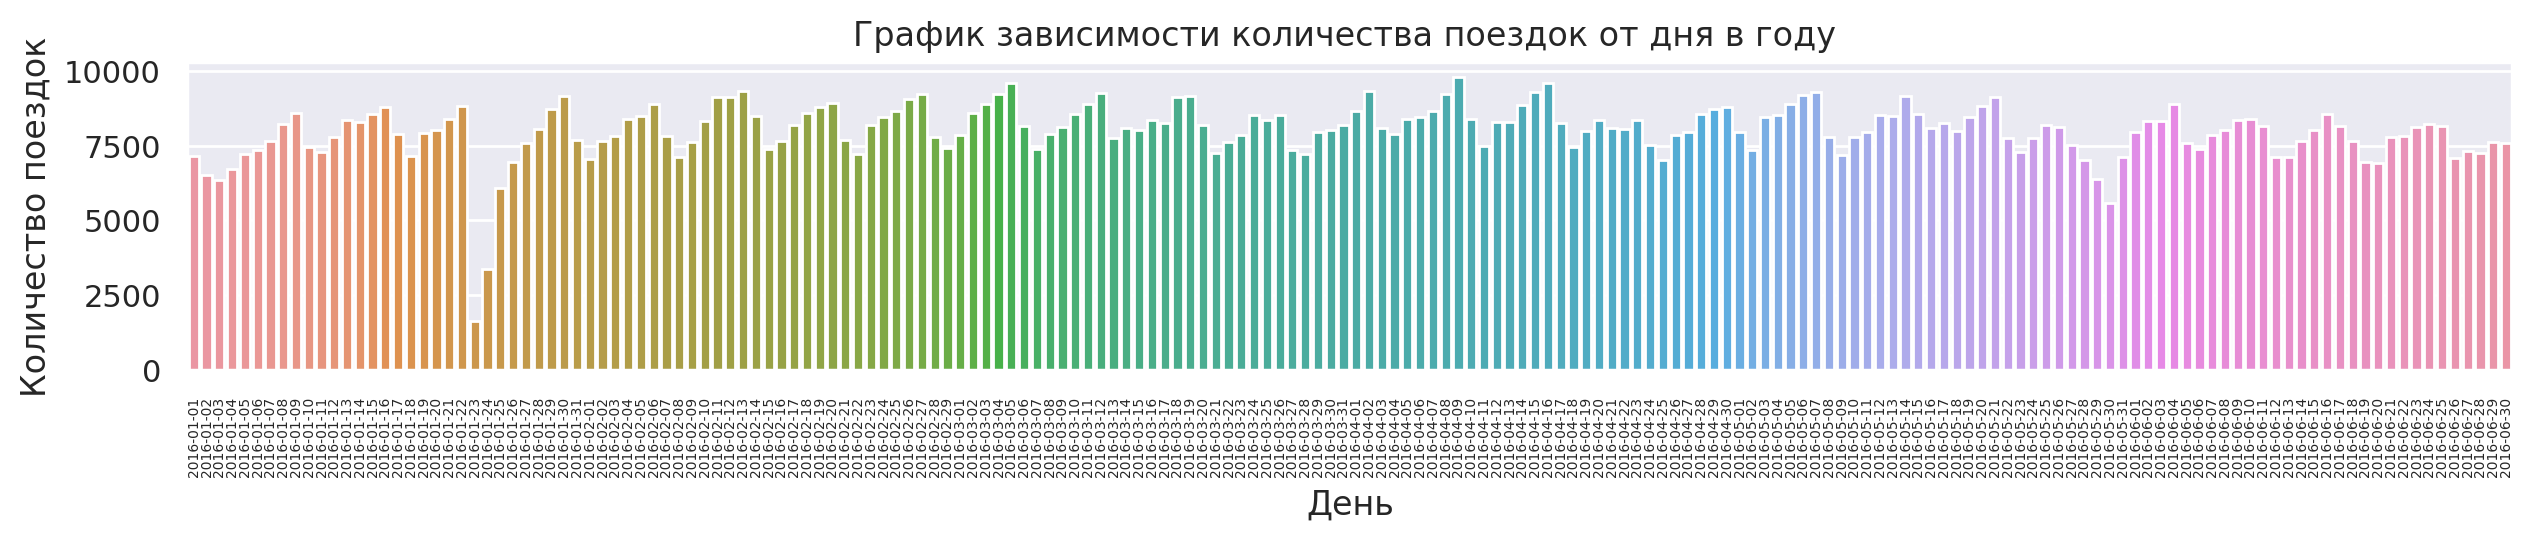

In [232]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
f = plt.figure(figsize=(15, 2))

ax = sns.countplot(data = copy_data_days, x = 'pickup_datetime')

plt.rcParams['font.size'] = 12
%config InlineBackend.figure_format = 'retina'
sns.set_style('darkgrid')
ax.tick_params(axis='x', rotation=90, labelsize = 5)
plt.title("График зависимости количества поездок от дня в году ")
plt.ylabel("Количество поездок")
plt.xlabel("День")
plt.show()


**Вопрос**: Вы, вероятно, заметили, что на графике есть 2 периода с аномально маленькими количествами поездок. Вычислите, в какие даты происходили эти скачки вниз и найдите информацию о том, что происходило в эти дни в Нью-Йорке.


23 января 2016 года в Нью Йорке был снежная буря,что повлияло так же на еще несколько дней вперед.
30 мая 2016 государственный праздник Memorial Day


Нарисуйте графики зависимости количества поездок от дня недели и от часов в сутках (воспользуйтесь `sns.relplot`):

In [233]:
copy_data_weekday = train_df[['pickup_datetime']].copy()
copy_data_weekday['pickup_datetime'] = copy_data_weekday['pickup_datetime'].dt.weekday.value_counts()
copy_data_weekday = copy_data_weekday.sort_index()
copy_data_weekday.head(3)

pickup_datetime
0         187418.0
1         202749.0
2         210136.0

<Figure size 1800x200 with 0 Axes>

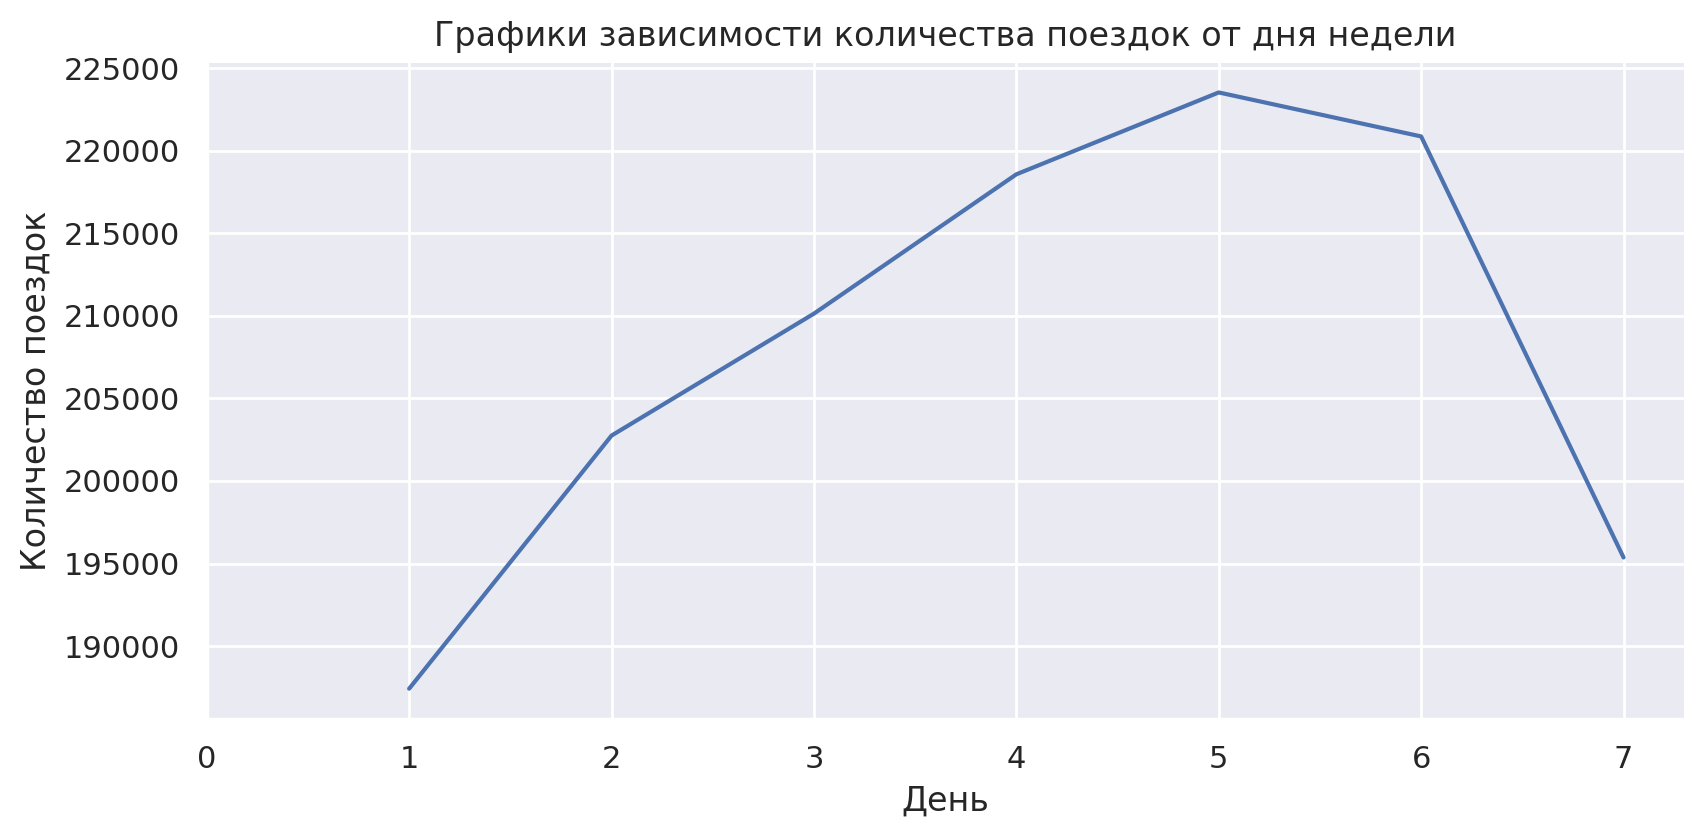

In [234]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
f = plt.figure(figsize=(18, 2))

ax = sns.relplot(x = copy_data_weekday.index + 1, y = copy_data_weekday['pickup_datetime'], kind = 'line')


plt.xticks(range(8))
ax.figure.set_size_inches(10, 4)

plt.title("Графики зависимости количества поездок от дня недели")
plt.ylabel("Количество поездок")
plt.xlabel("День")

plt.show()


In [235]:
copy_data_hour = train_df[['pickup_datetime']].copy()
copy_data_hour['pickup_datetime'] = copy_data_hour['pickup_datetime'].dt.hour.value_counts()
copy_data_hour = copy_data_hour.sort_index()
copy_data_hour.head(3)

pickup_datetime
0          53248.0
1          38571.0
2          27972.0

<Figure size 1700x1000 with 0 Axes>

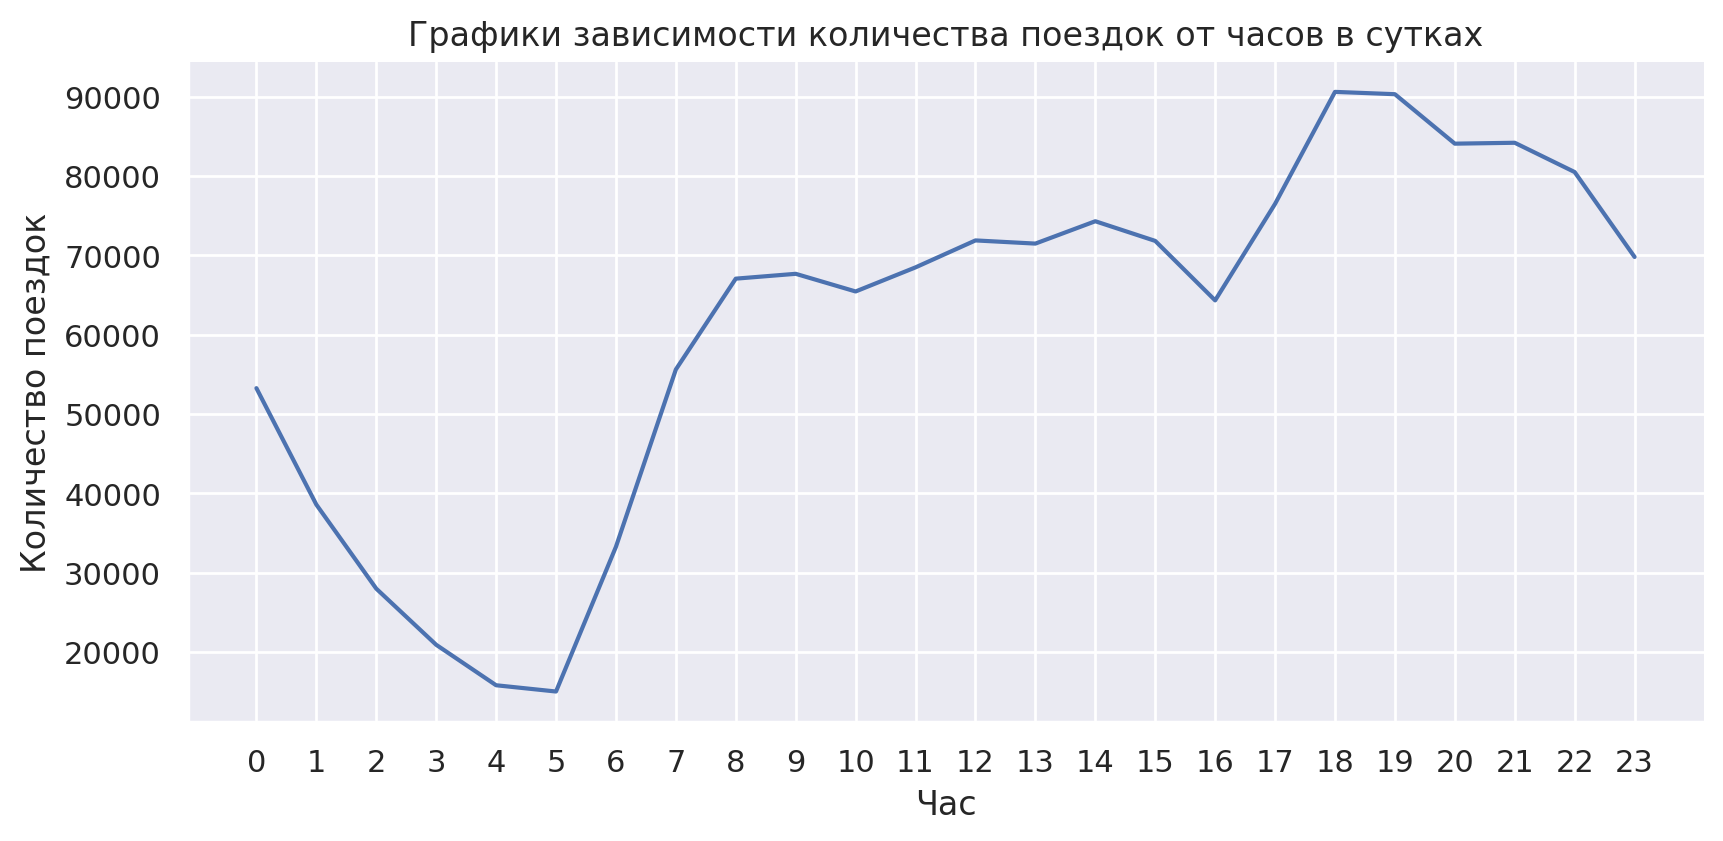

In [236]:
f = plt.figure(figsize=(17, 10))

ax = sns.relplot(x = copy_data_hour.index, y = copy_data_hour['pickup_datetime'], kind = 'line')

plt.xticks(range(24))
ax.figure.set_size_inches(10, 4)

plt.title("Графики зависимости количества поездок от часов в сутках")
plt.ylabel("Количество поездок")
plt.xlabel("Час")
plt.show()


**Задание 3 (0.5 баллов)**. Нарисуйте на одном графике зависимости количества поездок от часа в сутках для разных месяцев (разные кривые, соответствующие разным месяцам, окрашивайте в разные цвета, воспользуйтесь `hue` в `sns.relplot`). Аналогично нарисуйте зависимости количества поездок от часа в сутках для разных дней недели.

In [237]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

copy_data_month_hour = train_df[['pickup_datetime']].copy()
copy_data_month_hour['month'] = copy_data_month_hour['pickup_datetime'].dt.month
copy_data_month_hour['hour'] = copy_data_month_hour['pickup_datetime'].dt.hour


copy_data_month_hour = copy_data_month_hour.groupby(['month', 'hour']).count().reset_index()
copy_data_month_hour = copy_data_month_hour.sort_index()
copy_data_month_hour.head(3)

month  hour  pickup_datetime
0      1     0             8330
1      1     1             6400
2      1     2             4830

<Figure size 3000x1000 with 0 Axes>

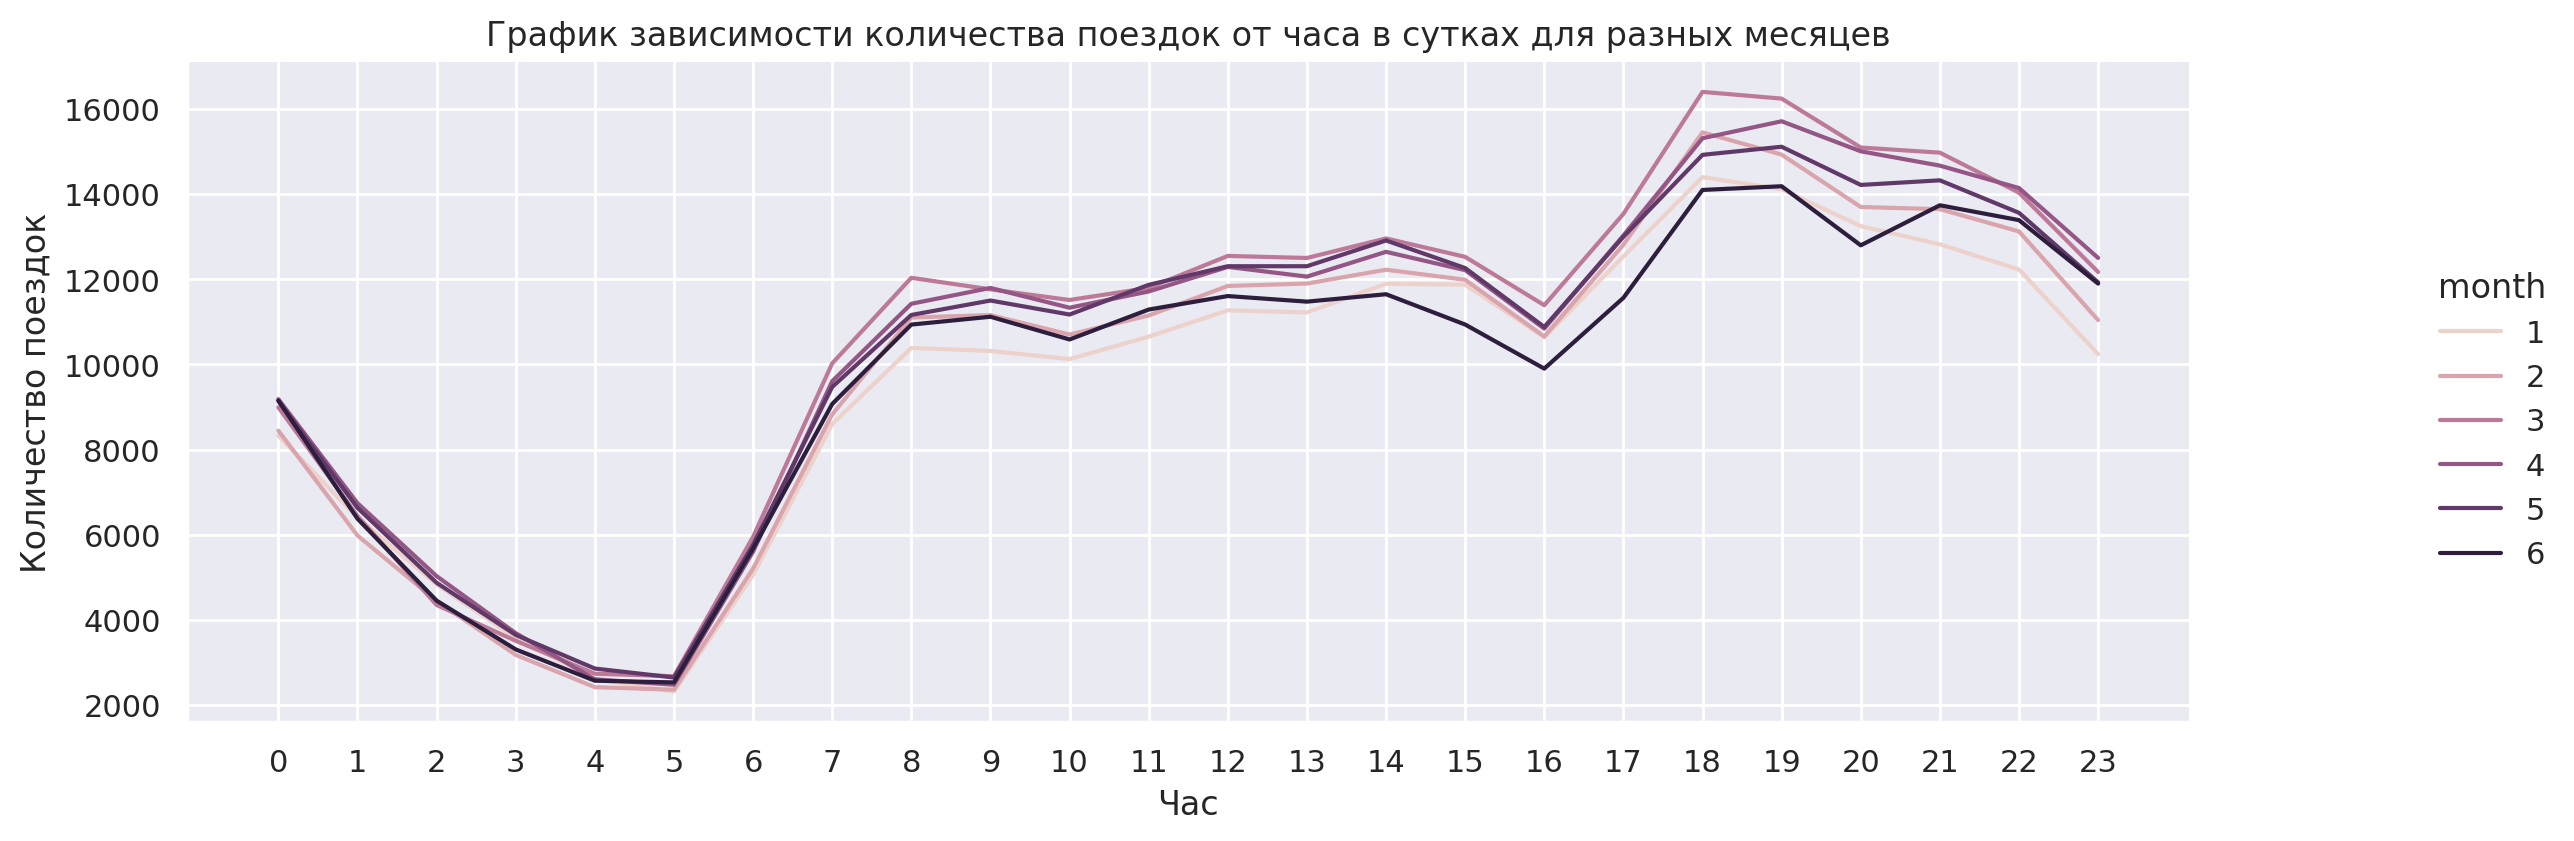

In [238]:
f = plt.figure(figsize=(30, 10))

ax = sns.relplot(data = copy_data_month_hour, x = 'hour', y = 'pickup_datetime', kind = 'line',hue = 'month')

plt.xticks(range(24))
ax.figure.set_size_inches(15, 4)

plt.title("График зависимости количества поездок от часа в сутках для разных месяцев")
plt.ylabel("Количество поездок")
plt.xlabel("Час")
plt.show()



В 1 месяце сильно просело количество поездок, на это, видимо, повлияла буря, а в остальные зимние месяцы больше ездят, чем в весенние, наверное, из-за мороза.

Меньше всего поездок в июне, скорее всего, потому что жарко

In [239]:
copy_data_weekday_hour = train_df[['pickup_datetime']].copy()
copy_data_weekday_hour['weekday'] = copy_data_weekday_hour['pickup_datetime'].dt.weekday + 1
copy_data_weekday_hour['hour'] = copy_data_weekday_hour['pickup_datetime'].dt.hour


copy_data_weekday_hour = copy_data_weekday_hour.groupby(['weekday', 'hour']).count().reset_index()
copy_data_weekday_hour = copy_data_weekday_hour.sort_index()
copy_data_weekday_hour.head(3)

weekday  hour  pickup_datetime
0        1     0             4299
1        1     1             2578
2        1     2             1658

<Figure size 1500x400 with 0 Axes>

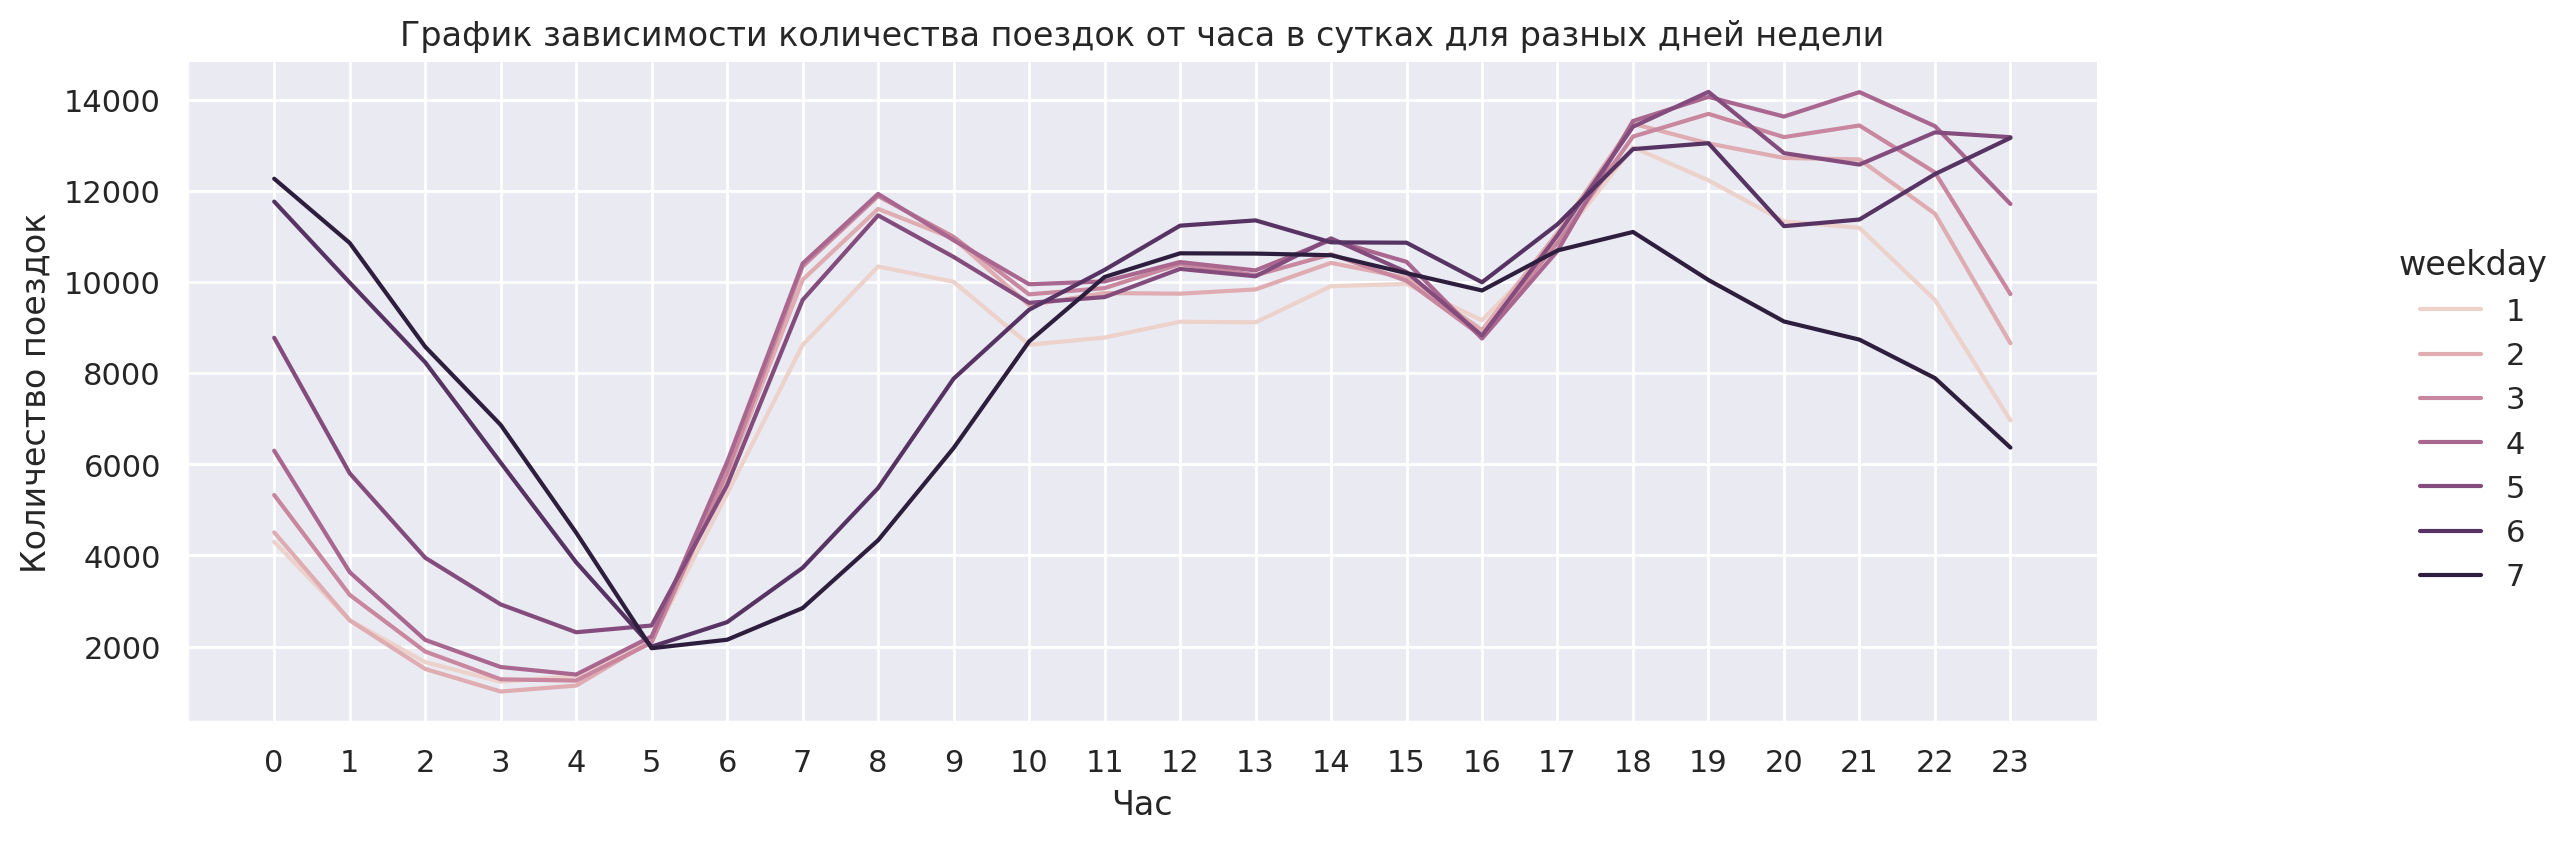

In [240]:
f = plt.figure(figsize=(15, 4))

ax = sns.relplot(data = copy_data_weekday_hour, x = 'hour', y = 'pickup_datetime', kind = 'line',hue = 'weekday')

plt.xticks(range(24))
ax.figure.set_size_inches(15, 4)


plt.title("График зависимости количества поездок от часа в сутках для разных дней недели")
plt.ylabel("Количество поездок")
plt.xlabel("Час")
plt.show()

**Вопрос**: Какие выводы можно сделать, основываясь на графиках выше? Выделяются ли какие-нибудь дни недели? Месяца? Время суток? С чем это связано?


**Ответ**:
Можно увидеть, что утренние и вечерные часы в будни сильно отличаются от выходных, так как люди едут на работу и с нее. Зато поздно ночью с 0 до 5 люди в выходные едут/возвращаются из клубов, поэтому поездок в эти часы больше, чем в будние

**Задание 4 (0.5 баллов)**. Разбейте выборку на обучающую и тестовую в отношении 7:3 (используйте `train_test_split` из `sklearn`). По обучающей выборке нарисуйте график зависимости среднего логарифма времени поездки от дня недели. Затем сделайте то же самое, но для часа в сутках и дня в году.

In [241]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
from sklearn.model_selection import train_test_split

X_train, X_test = train_test_split(train_df, train_size=0.7, random_state=42)

In [242]:

def create_criteria(df):
    df['pickup_weekday'] = df['pickup_datetime'].dt.weekday + 1
    df['pickup_month'] = df['pickup_datetime'].dt.month
    df['pickup_hour'] = df['pickup_datetime'].dt.hour
    df['pickup_day'] = df['pickup_datetime'].dt.dayofyear
    df['is_abnormal_january'] = 0
    df['is_abnormal_may'] = 0
    df['is_abnormal_january'] = df['is_abnormal_january'].mask(df['pickup_day'].isin([23, 24, 25]) , 1)

    df['is_abnormal_may'] = df['is_abnormal_may'].mask(df['pickup_day'].isin([150, 151]) , 1) # 150 - это 29 мая 2016

    df[df['is_abnormal_may'] == 1]

create_criteria(X_train)
create_criteria(X_test)

<Figure size 1700x1000 with 0 Axes>

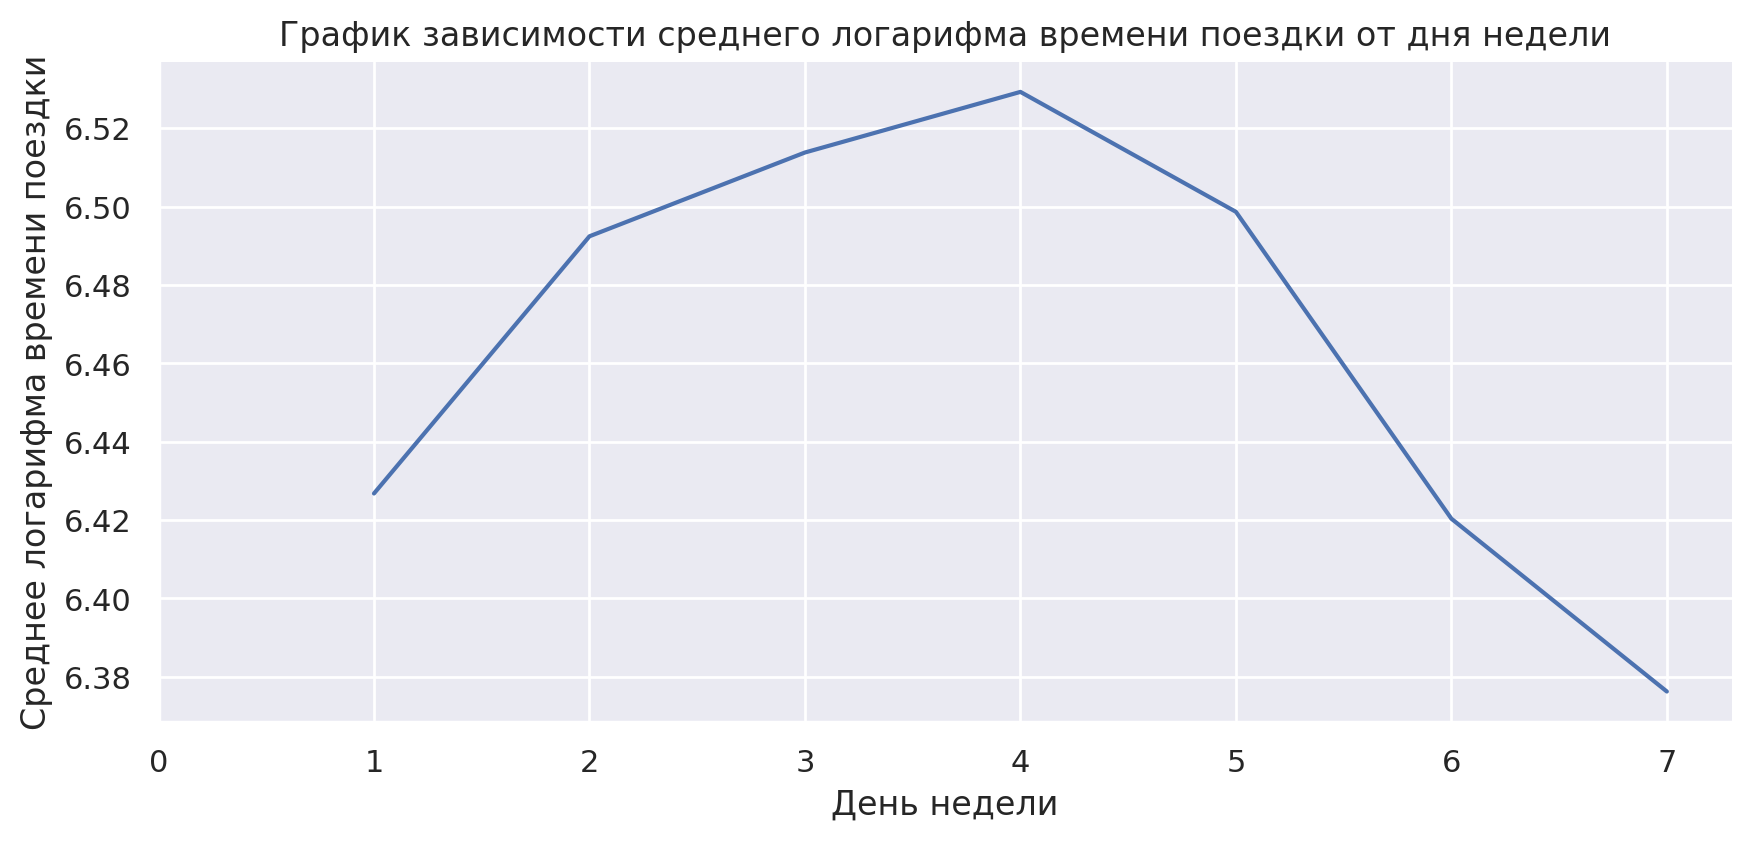

In [243]:
mean_dur_by_weekday = X_train.groupby(['pickup_weekday']).agg({'log_trip_duration':'mean'}).reset_index()
mean_dur_by_weekday.sort_values(by = 'pickup_weekday')


f = plt.figure(figsize=(17, 10))

ax = sns.relplot(data = mean_dur_by_weekday, x = 'pickup_weekday', y = 'log_trip_duration', kind = 'line')

plt.xticks(range(8))
ax.figure.set_size_inches(10, 4)

plt.title("График зависимости среднего логарифма времени поездки от дня недели")
plt.ylabel("Среднее логарифма времени поездки")
plt.xlabel("День недели")
plt.show()


<Figure size 1000x1000 with 0 Axes>

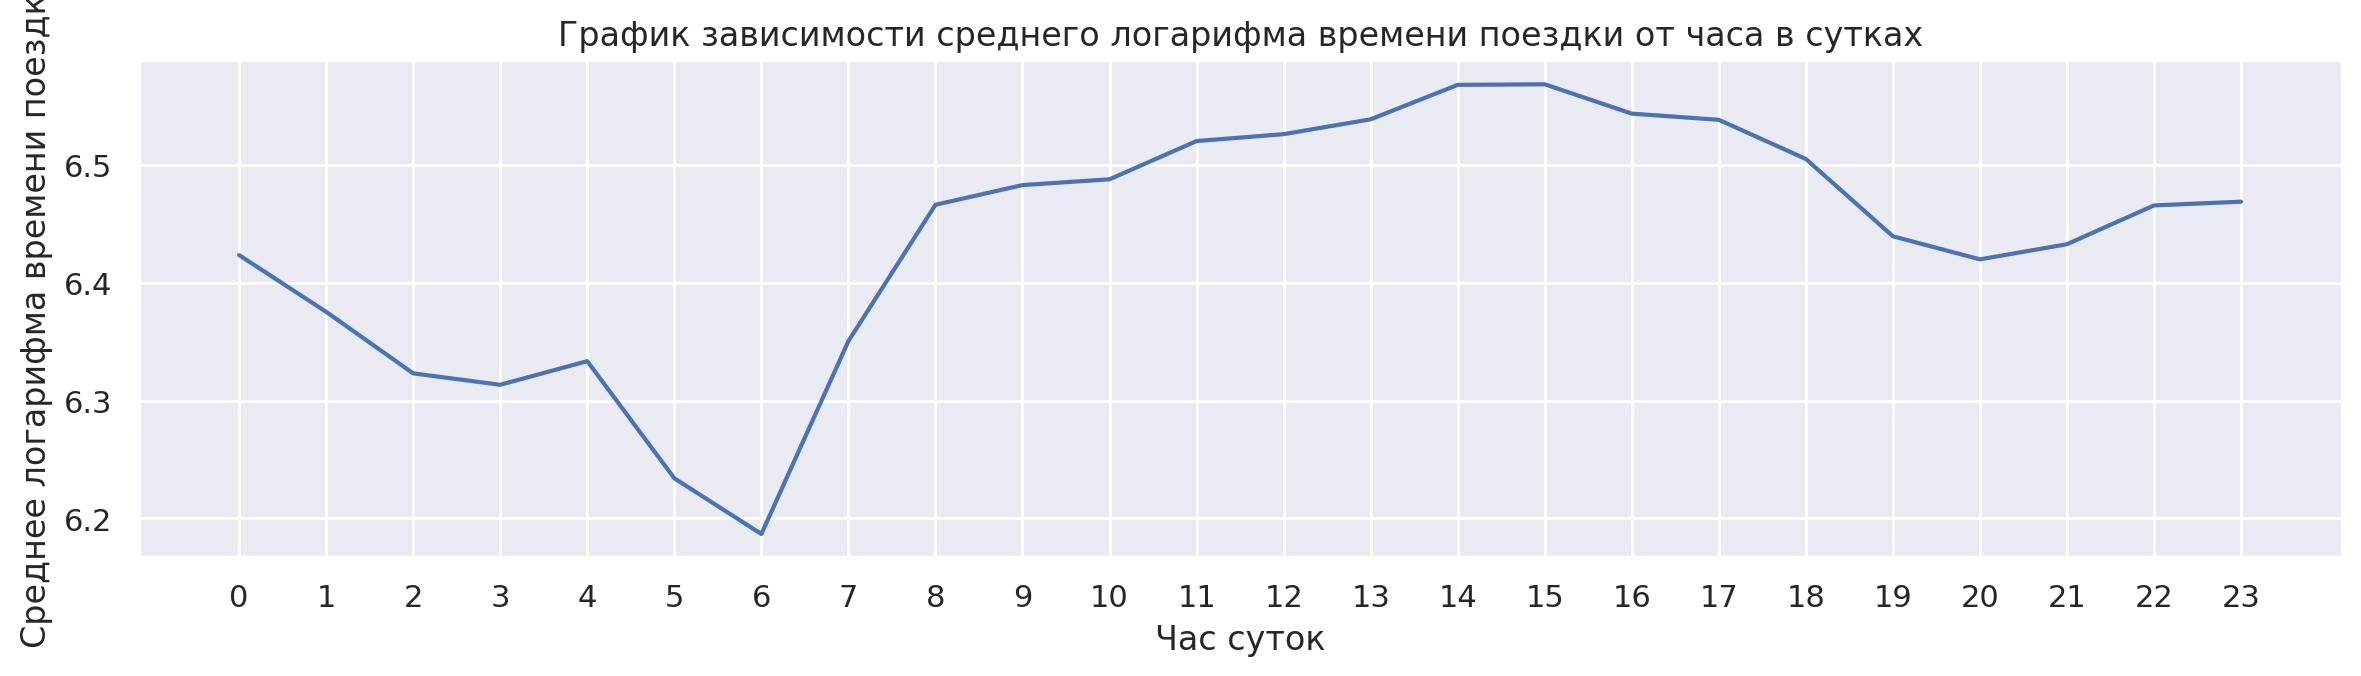

In [244]:
mean_dur_by_weekday = X_train.groupby(['pickup_hour']).agg({'log_trip_duration':'mean'}).reset_index()
mean_dur_by_weekday.sort_values(by = 'pickup_hour')


g = plt.figure(figsize=(10, 10))

ax = sns.relplot(data = mean_dur_by_weekday, x = 'pickup_hour', y = 'log_trip_duration', kind = 'line')

plt.xticks(range(24))
ax.figure.set_size_inches(14, 3)

plt.title("График зависимости среднего логарифма времени поездки от часа в сутках")
plt.ylabel("Среднее логарифма времени поездки")
plt.xlabel("Час суток")
plt.show()

<Figure size 3000x1000 with 0 Axes>

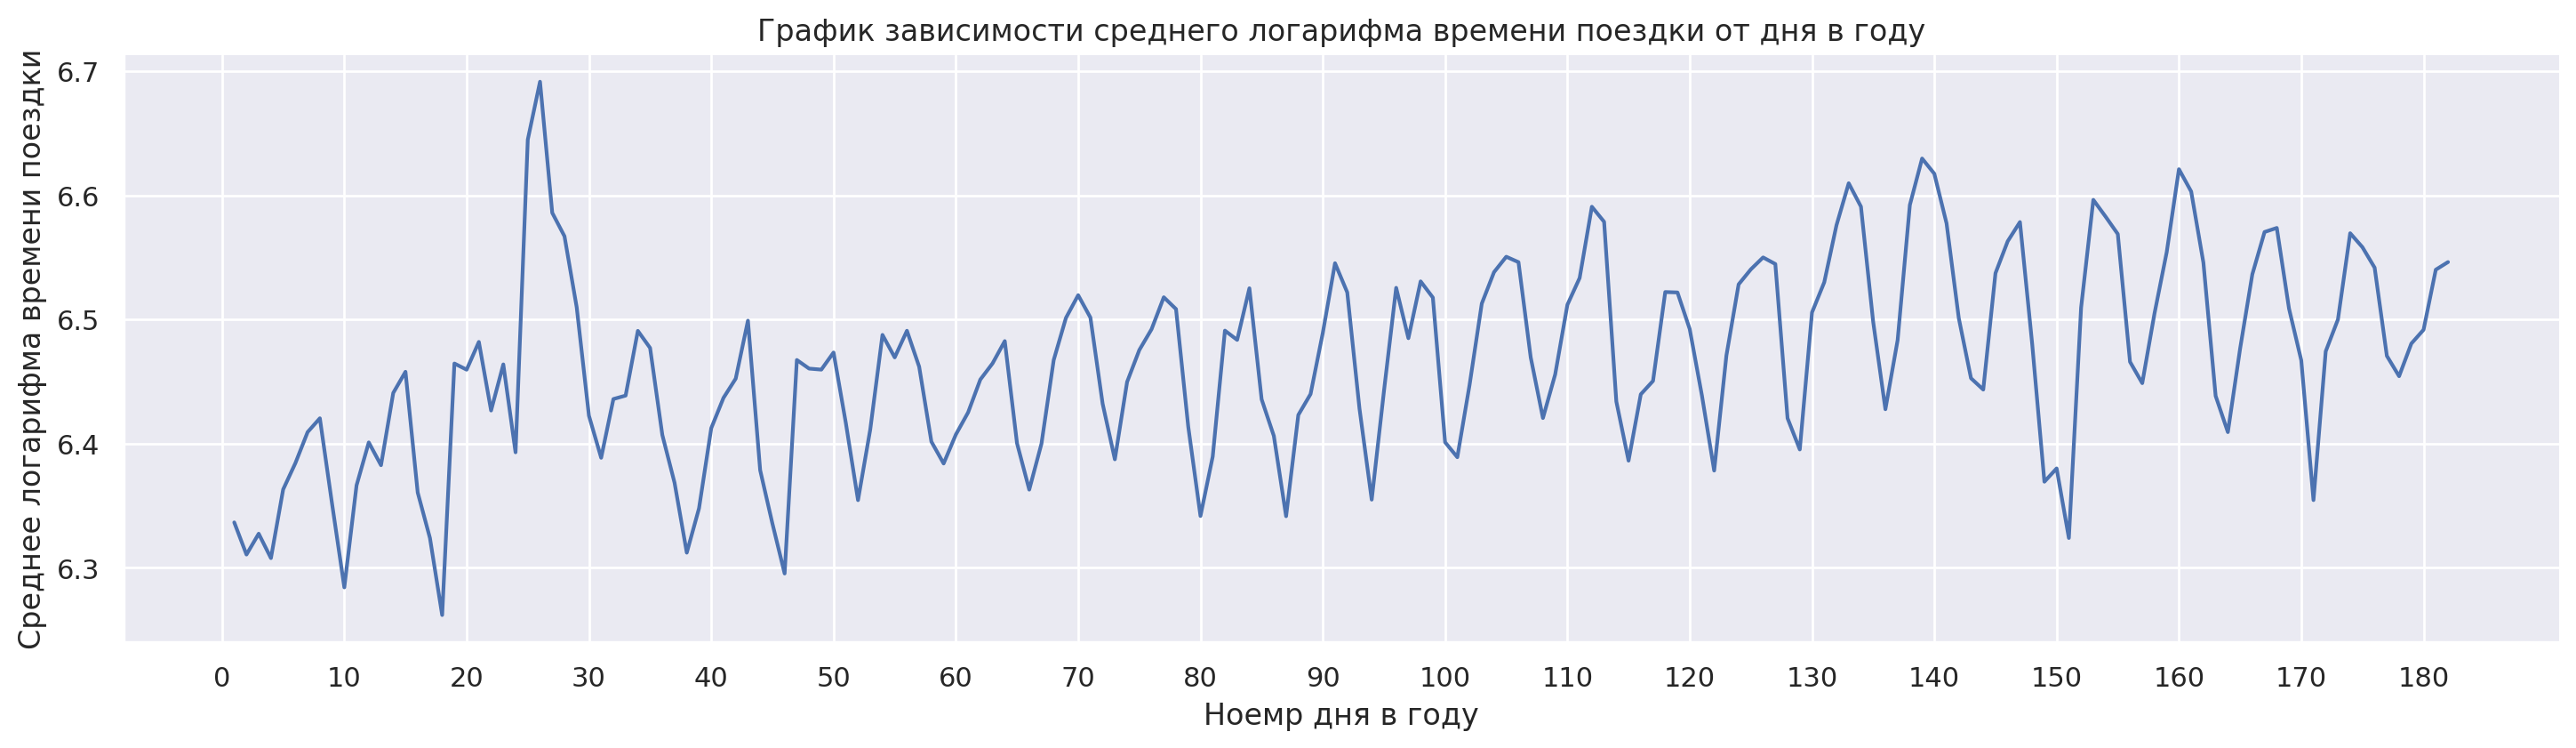

In [245]:
mean_dur_by_weekday = X_train.groupby(['pickup_day']).agg({'log_trip_duration':'mean'}).reset_index()
mean_dur_by_weekday.sort_values(by = 'pickup_day')


f = plt.figure(figsize=(30, 10))

ax = sns.relplot(data = mean_dur_by_weekday, x = 'pickup_day', y = 'log_trip_duration', kind = 'line')

plt.xticks(range(0, 190, 10))
ax.figure.set_size_inches(17, 4)

plt.title("График зависимости среднего логарифма времени поездки от дня в году")
plt.ylabel("Среднее логарифма времени поездки")
plt.xlabel("Ноемр дня в году")
plt.show()

**Вопрос**: Похожи ли графики зависимости таргета от дня недели и от часа в сутках на аналогичные графики для количества поездок? Почему? Что происходит со средним таргетом в те два аномальных периода, что мы видели выше? Почему так происходит? Наблюдаете ли вы какой-нибудь тренд на графике зависимости `log_trip_duration` от номера дня в году?

**Ответ**:
Графики похожи для количество поездок от часа и длительность поездок от часа, одн и те же пики, которые, скорее всего, связаны с пробками на дорогах, вызванными поток машин. Аналогично похожи количество поездок от дня недели и длительность поездок от дня недели из-за будних и выходных дней.

На графике от дня в году заметен сильный упадок длительности на 151 дне, что как раз 30 мая, государственный праздник, скорее всего, люди в этот день мало ездили или делали недолгие поездки. Также увеличилась длительность в конце января, скорее всего связана с рождеством, поездками к родным. Можно увидеть периодичность на графике, которая связана с днем недели



Добавьте следующие признаки на основе `pickup_datetime`:
1. День недели
2. Месяц
3. Час
4. Является ли период аномальным (два бинарных признака, соответствующие двум аномальным периодам)
5. Номер дня в году

In [246]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
# Это делает create_criteria
X_test[X_test['is_abnormal_may'] == 1].head(3)

id  vendor_id     pickup_datetime  passenger_count  \
1072483  id1927110          2 2016-05-29 16:49:08                2   
169887   id2578997          2 2016-05-30 20:52:18                1   
1281739  id2905320          2 2016-05-30 15:35:51                2   

         pickup_longitude  pickup_latitude  dropoff_longitude  \
1072483        -73.983192        40.785240         -73.978233   
169887         -73.996323        40.725048         -73.980484   
1281739        -73.988838        40.736610         -73.990807   

         dropoff_latitude store_and_fwd_flag  trip_duration  \
1072483         40.748322                  N           1327   
169887          40.730206                  N            577   
1281739         40.750359                  N            476   

         log_trip_duration  pickup_weekday  pickup_month  pickup_hour  \
1072483           7.191429               7             5           16   
169887            6.359574               1             5           20   
1281739           6.167516               1             5           15   

         pickup_day  is_abnormal_january  is_abnormal_may  
1072483         150                    0                1  
169887          151                    0                1  
1281739         151                    0                1

Итак, мы уже создали некоторое количество признаков.

**Вопрос**: Какие из признаков _стоит рассматривать в этой задаче_   как категориальные, а какие - как численные? Почему?

**Ответ**: Зависимости, которую можно было бы выразить линейно с подборок весов для длительности поездки от дня недели, номера дня или же часа нет, поэтому всех их надо рассматривать как категориальные

**Задание 5 (0.75 баллов)**. Обучите `Ridge`-регрессию с параметрами по умолчанию, закодировав все категориальные признаки с помощью `OneHotEncoder`. Численные признаки отмасштабируйте с помощью `StandardScaler`. Используйте только признаки, которые мы выделили в этой части задания.

In [247]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Ridge

In [248]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
#сем
categorical = ['is_abnormal_january', 'is_abnormal_may', 'pickup_weekday', 'pickup_month', 'pickup_hour', 'pickup_day']
numeric_features =[]

column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown="ignore"), categorical),
    ('scaling', StandardScaler(), numeric_features)
])

pipeline = Pipeline(steps=[
    ('ohe_and_scaling', column_transformer),
    ('regression', Ridge())
])

model = pipeline.fit(X_train[categorical + numeric_features], X_train['log_trip_duration'])
y_pred = model.predict(X_test[categorical + numeric_features])

print("Test RMSE = %.4f" % mean_squared_error(X_test['log_trip_duration'], y_pred, squared=False))

Test RMSE = 0.7871


## Часть 2. Изучаем координаты (3 балла)
Мы уже очень хорошо изучили данные о времени начала поездки, давайте теперь посмотрим на информацию о координатах начала и конца поездки. Мы подготовили для вас функцию, которая на карте рисует точки начала или конца поездки. Примеры ее вызова вы найдете ниже. Обратите внимание, что в эту функцию мы передаем лишь небольшой кусочек данных, посколько иначе функция будет работать очень долго

In [249]:
def show_circles_on_map(data, latitude_column, longitude_column, color):
    """
    The function draws map with circles on it.
    The center of the map is the mean of coordinates passed in data.

    data: DataFrame that contains columns latitude_column and longitude_column
    latitude_column: string, the name of column for latitude coordinates
    longitude_column: string, the name of column for longitude coordinates
    color: string, the color of circles to be drawn
    """

    location = (data[latitude_column].mean(), data[longitude_column].mean())
    m = folium.Map(location=location)

    for _, row in data.iterrows():
        folium.Circle(
            radius=100,
            location=(row[latitude_column], row[longitude_column]),
            color=color,
            fill_color=color,
            fill=True
        ).add_to(m)

    return m

In [250]:
show_circles_on_map(X_train.sample(1000), "pickup_latitude", "pickup_longitude", "blue")

In [251]:
show_circles_on_map(X_train.sample(1000), "dropoff_latitude", "pickup_longitude", "blue")

**Вопрос**: Какие пункты (или скопления точек, в количестве 2-3), по вашему мнению, выделяются на карте от основной массы и могут быть полезны для нашей задачи? Почему вы их выбрали? В чём особенность этих скоплений точек для нашей задачи?


Выделяются аэропорты: Джона Кеннади и Ла Гуардия

**Задание 6 (0.75 балл)**. Как мы все прекрасно помним, $t = s / v_{\text{ср}}$, поэтому очевидно, что самым сильным признаком будет расстояние, которое необходимо проехать. Мы не можем посчитать точное расстояние, которое необходимо преодолеть такси, но мы можем его оценить, посчитав кратчайшее расстояние между точками начала и конца поездки. Чтобы корректно посчитать расстояние между двумя точками на Земле, можно использовать функцию `haversine`. Также можно воспользоваться кодом с первого семинара. Посчитайте кратчайшее расстояние для объектов и запишите его в колонку `haversine`:

In [252]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

def haversine_array(lat1, lng1, lat2, lng2): # сем
    lat1, lng1, lat2, lng2 = map(np.radians, (lat1, lng1, lat2, lng2))
    AVG_EARTH_RADIUS = 6371  # in km
    lat = lat2 - lat1
    lng = lng2 - lng1
    d = np.sin(lat * 0.5) ** 2 + np.cos(lat1) * np.cos(lat2) * np.sin(lng * 0.5) ** 2
    h = 2 * AVG_EARTH_RADIUS * np.arcsin(np.sqrt(d))
    return h

X_train['haversine'] = haversine_array(X_train['pickup_latitude'].values, X_train['pickup_longitude'].values, X_train['dropoff_latitude'].values, X_train['dropoff_longitude'].values)
X_test['haversine'] = haversine_array(X_test['pickup_latitude'].values, X_test['pickup_longitude'].values, X_test['dropoff_latitude'].values, X_test['dropoff_longitude'].values)


Так как мы предсказываем логарифм времени поездки и хотим, чтобы наши признаки были линейно зависимы с этой целевой переменной, нам нужно логарифмировать расстояние: $\log t = \log s - \log{v_{\text{ср}}}$. Запишите логарифм `haversine` в отдельную колонку `log_haversine`:

In [253]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
X_train['log_haversine'] = np.log1p(X_train['haversine'] )
X_test['log_haversine'] = np.log1p(X_test['haversine'])

Убедимся, что логарифм расстояния лучше коррелирует с нашим таргетом, чем просто расстояние:

In [254]:
your_df = X_train
assert your_df['log_haversine'].corr(your_df['log_trip_duration']) > your_df['haversine'].corr(your_df['log_trip_duration'])

**Задание 7 (0.75 балла)**. Давайте изучим среднюю скорость движения такси. Посчитайте среднюю скорость для каждого объекта обучающей выборки, разделив `haversine` на `trip_duration`, и нарисуйте гистограмму ее распределения

In [255]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
X_train['avg_speed'] = X_train['haversine'] / X_train['trip_duration']

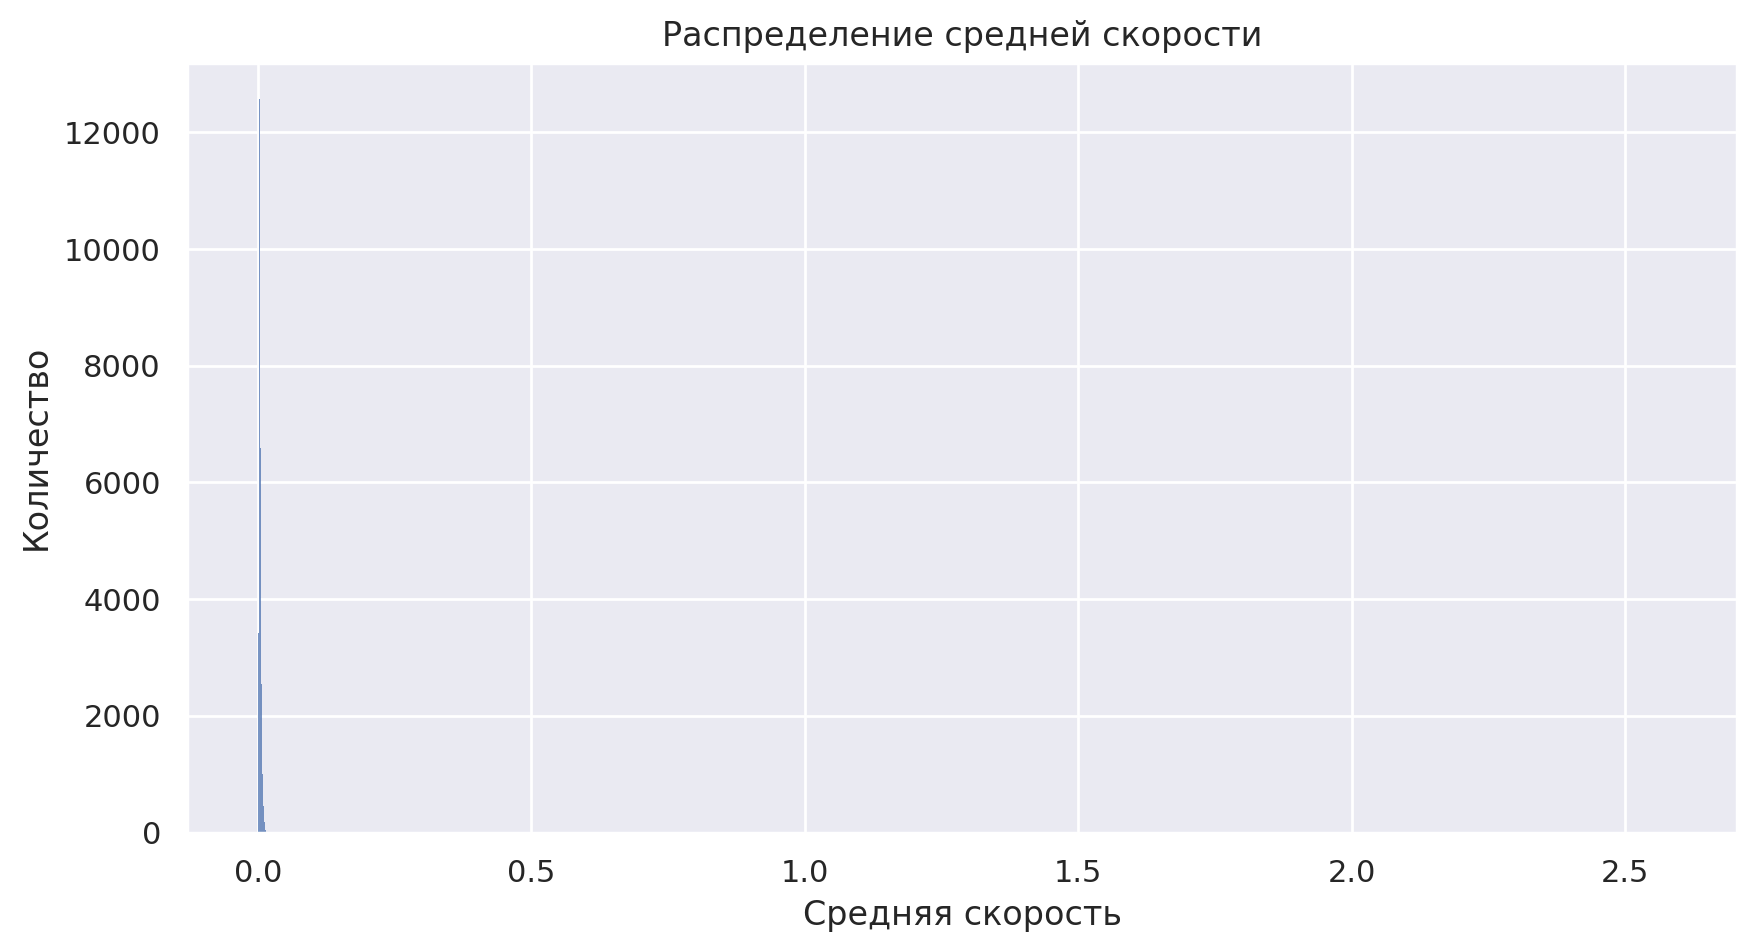

In [256]:
plt.figure(figsize=(10, 5))
sns.histplot(X_train['avg_speed'])

ax.figure.set_size_inches(10, 5)

plt.title("Распределение средней скорости")
plt.xlabel("Средняя скорость")
plt.ylabel("Количество")
plt.show()


Как можно видеть по гистограмме, для некоторых объектов у нас получились очень больше значения скоростей. Нарисуйте гистограмму по объектам, для которых значение скорости получилось разумным (например, можно не включать рассмотрение объекты, где скорость больше некоторой квантили):

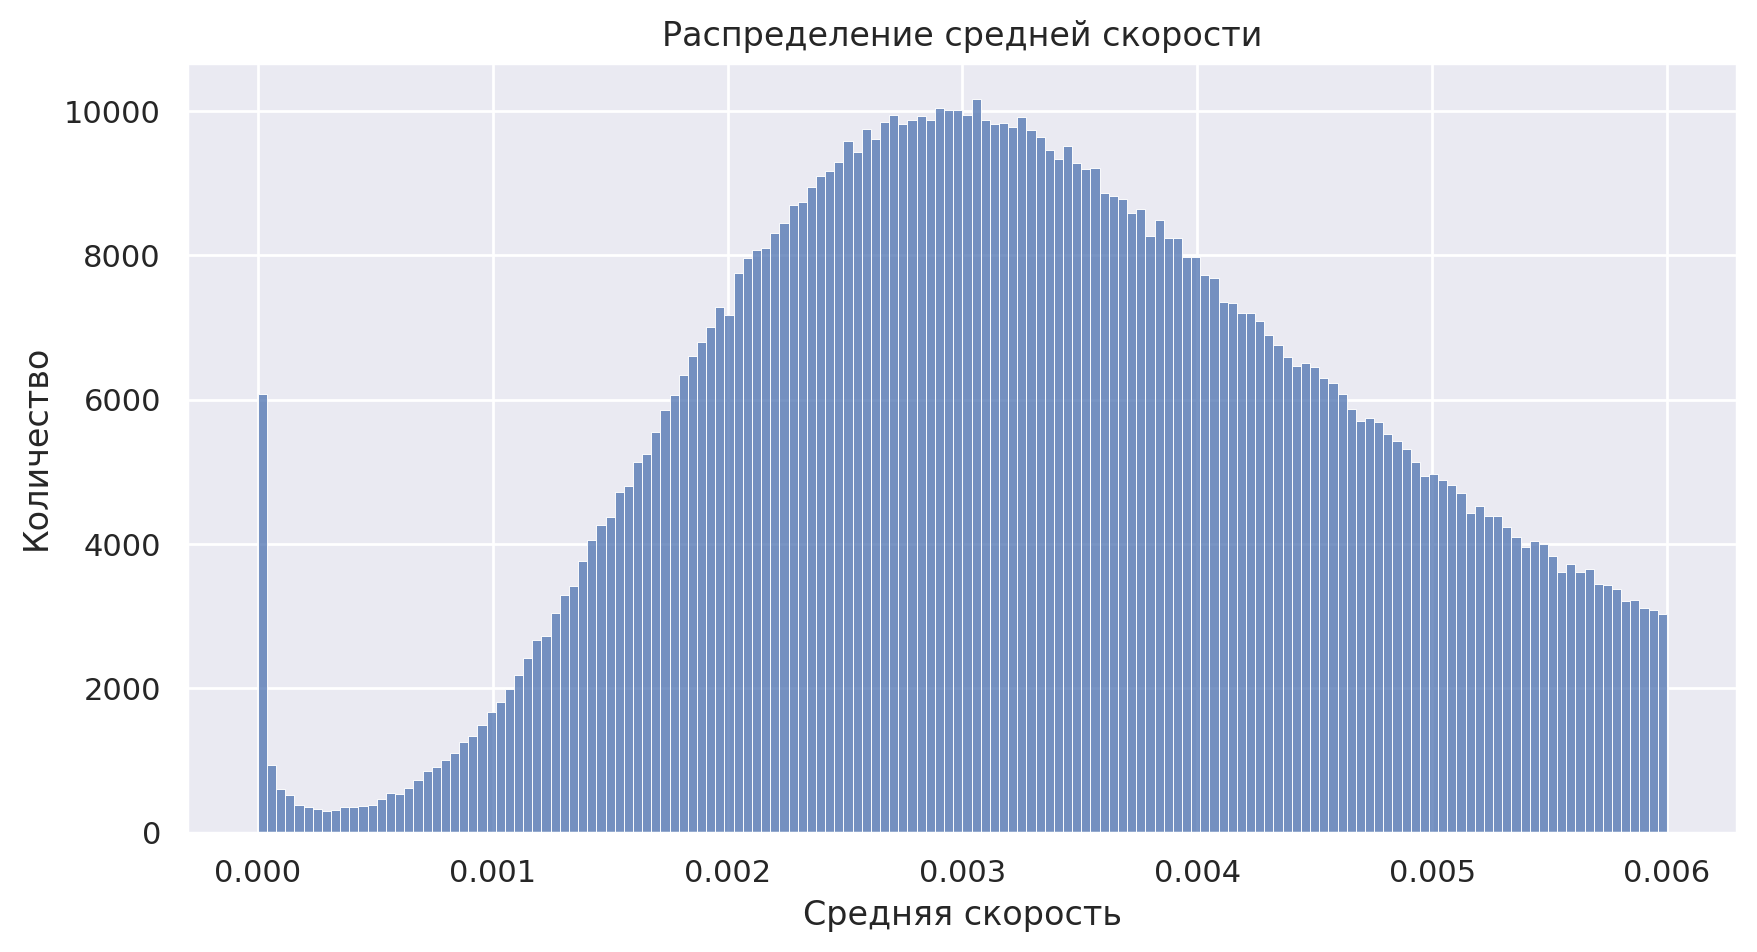

In [257]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
avg_speed_filtered = X_train[X_train['avg_speed'] < 0.006]['avg_speed']

plt.figure(figsize=(10, 5))
sns.histplot(avg_speed_filtered)

ax.figure.set_size_inches(10, 5)

plt.title("Распределение средней скорости")
plt.xlabel("Средняя скорость")
plt.ylabel("Количество")
plt.show()

Для каждой пары (день недели, час суток) посчитайте медиану скоростей. Нарисуйте с помощью `sns.heatmap` график, где по осям будут дни недели и часы, а в качестве значения функции - медиана скорости

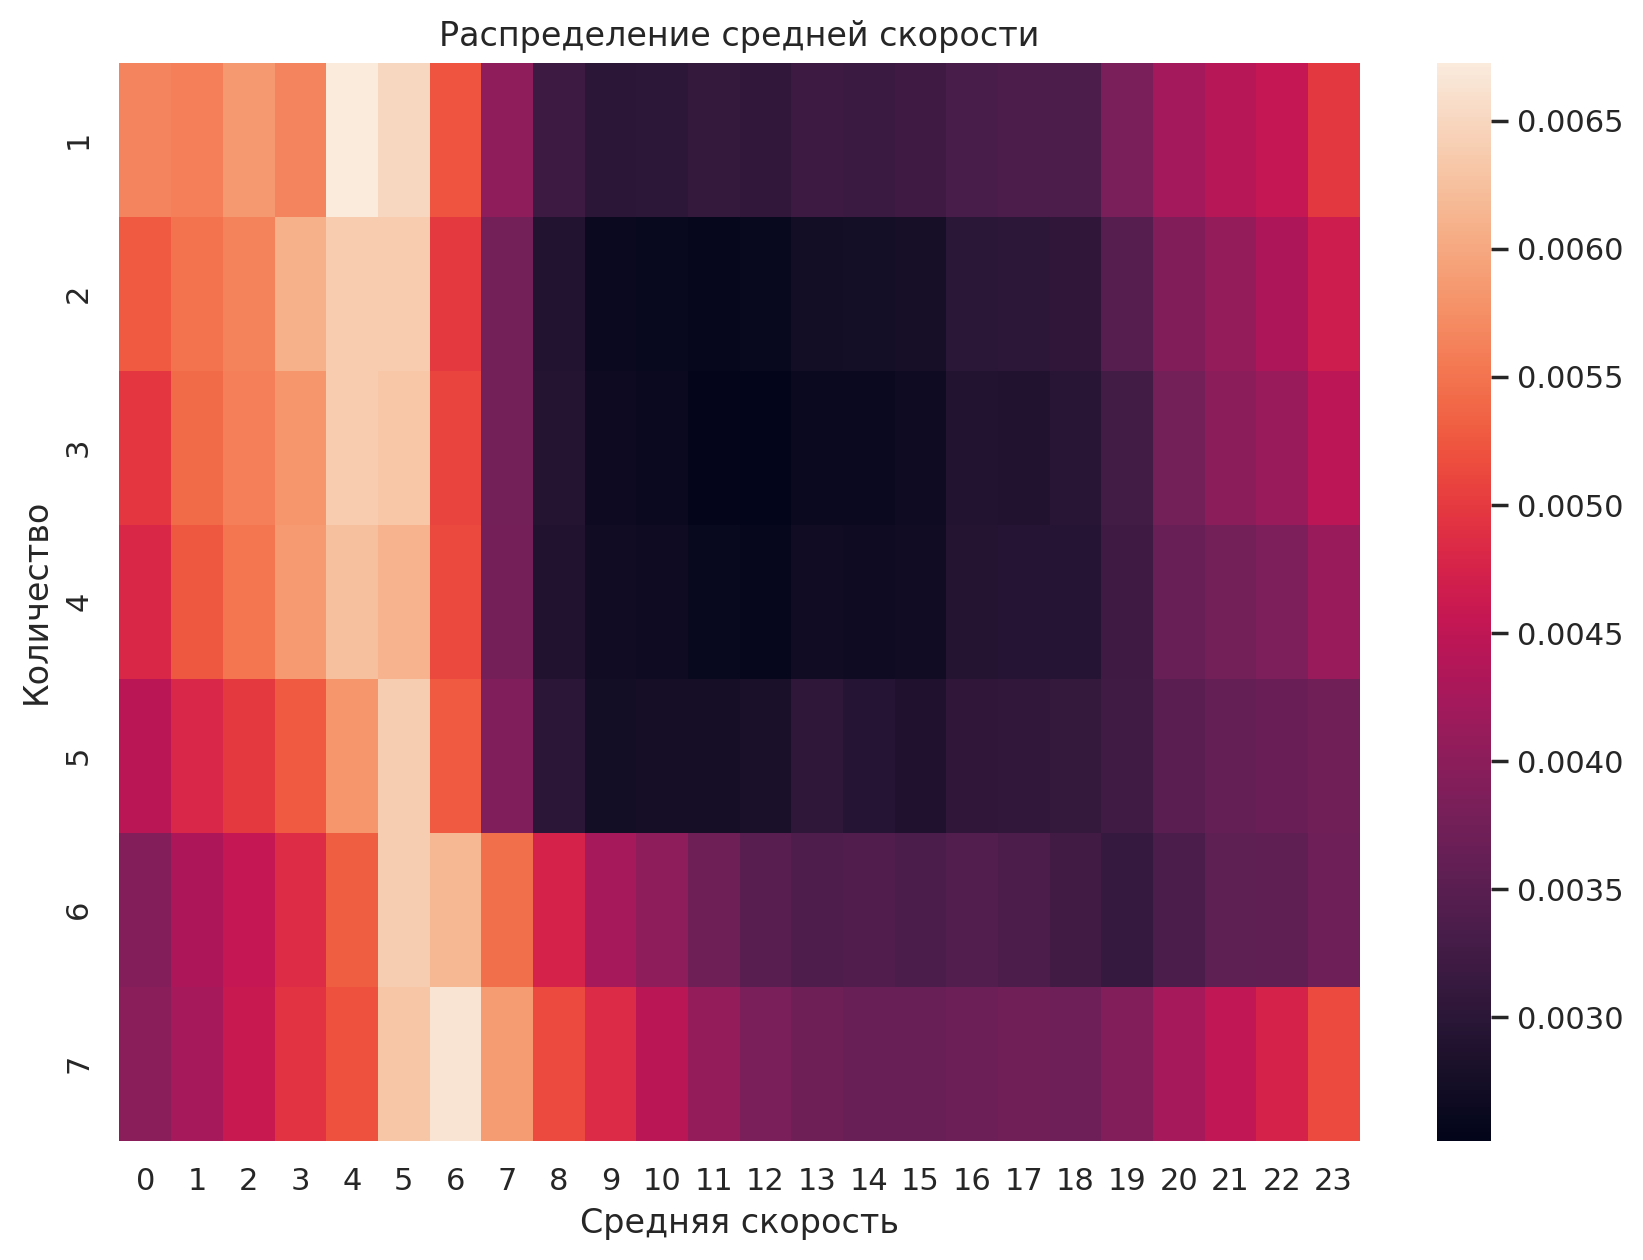

In [258]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
plt.figure(figsize=(10, 7))

copy_X_train = X_train.groupby(['pickup_weekday', 'pickup_hour']).agg({'avg_speed':'median'}).reset_index()

glue = copy_X_train.pivot(index="pickup_weekday", columns="pickup_hour",  values="avg_speed")
sns.heatmap(glue)

ax.figure.set_size_inches(10, 10)

plt.title("Распределение средней скорости")
plt.xlabel("Средняя скорость")
plt.ylabel("Количество")
plt.show()

Не забудьте удалить колонку со значением скорости из данных!

**Вопрос**: Почему значение скорости нельзя использовать во время обучения?


Оно зависит от длительности поездки, которую нам и надо предсказать

In [259]:
X_train = X_train.drop(['avg_speed'], axis = 1)

**Вопрос**: Посмотрите внимательно на график и скажите, в какие моменты времени скорость минимальна; максимальна.

Скорость максимальная в будние утром, 4-5 утра, когда на дороге небольшой трафик.
Минимальна в середине недели, днем в 11 - 12




Создайте признаки "поездка совершается в период пробок" и "поездка совершается в период свободных дорог" (естественно, они не должен зависеть от скорости!):

In [260]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

def criteria_traffic(df):
    df['high_traffic'] = 0
    df['low_traffic'] = 0

    df['low_traffic'] = df['low_traffic'].mask(df['pickup_hour'] == 5, 1)
    df['low_traffic'] = df['low_traffic'].mask((df['pickup_hour'] == 4) & (df['pickup_weekday'].isin([1, 2, 3, 4])), 1)
    df['low_traffic'] = df['low_traffic'].mask((df['pickup_hour'] == 6) & (df['pickup_weekday'].isin([6, 7])), 1)

    df['high_traffic'] = df['high_traffic'].mask((df['pickup_hour'].isin([i for i in range(8, 19)])) & (df['pickup_weekday'].isin([2, 3, 4, 5])), 1)

criteria_traffic(X_train)
criteria_traffic(X_test)

In [261]:
X_train[X_train['high_traffic'] == 1]

id  vendor_id     pickup_datetime  passenger_count  \
1011257  id2209155          2 2016-05-03 09:03:08                2   
178550   id0586605          1 2016-01-01 16:40:51                1   
1173610  id0580742          1 2016-02-25 17:37:36                1   
1242800  id1196587          1 2016-04-29 14:51:57                1   
427473   id2506283          2 2016-04-22 14:26:59                1   
...            ...        ...                 ...              ...   
175203   id3426372          1 2016-05-06 16:56:37                1   
1136074  id2755164          1 2016-06-15 09:22:23                1   
732180   id1706421          1 2016-06-21 10:02:51                1   
1414414  id2204747          1 2016-02-16 18:01:45                1   
671155   id1458584          1 2016-01-19 11:53:47                1   

         pickup_longitude  pickup_latitude  dropoff_longitude  \
1011257        -73.979813        40.752529         -73.982681   
178550         -73.977623        40.746296         -73.968414   
1173610        -73.967720        40.768742         -73.977173   
1242800        -74.000603        40.741497         -74.006477   
427473         -73.944504        40.787800         -73.954689   
...                   ...              ...                ...   
175203         -73.959480        40.779991         -73.950180   
1136074        -74.004211        40.707253         -73.978951   
732180         -73.983253        40.731651         -73.978615   
1414414        -73.973618        40.763920         -73.983849   
671155         -73.962341        40.767323         -73.969757   

         dropoff_latitude store_and_fwd_flag  trip_duration  ...  \
1011257         40.763680                  N            844  ...   
178550          40.788933                  N           1001  ...   
1173610         40.789875                  N            732  ...   
1242800         40.714115                  N           1142  ...   
427473          40.773731                  N            336  ...   
...                   ...                ...            ...  ...   
175203          40.771748                  N            375  ...   
1136074         40.762222                  N           2161  ...   
732180          40.772369                  N           1912  ...   
1414414         40.749874                  N            833  ...   
671155          40.768669                  N            389  ...   

         pickup_weekday  pickup_month  pickup_hour  pickup_day  \
1011257               2             5            9         124   
178550                5             1           16           1   
1173610               4             2           17          56   
1242800               5             4           14         120   
427473                5             4           14         113   
...                 ...           ...          ...         ...   
175203                5             5           16         127   
1136074               3             6            9         167   
732180                2             6           10         173   
1414414               2             2           18          47   
671155                2             1           11          19   

         is_abnormal_january  is_abnormal_may  haversine  log_haversine  \
1011257                    0                0   1.263187       0.816774   
178550                     0                0   4.804012       1.758549   
1173610                    0                0   2.481063       1.247338   
1242800                    0                0   3.084708       1.407250   
427473                     0                0   1.784001       1.023889   
...                      ...              ...        ...            ...   
175203                     0                0   1.205617       0.791007   
1136074                    0                0   6.472330       2.011207   
732180                     0                0   4.544473       1.712802   
1414414                    0      

**Задание 8 (0.25 балла)**. Для каждого из замеченных вами выше 2-3 пунктов добавьте в выборку по два признака:
- началась ли поездка в этом пункте
- закончилась ли поездка в этом пункте

Как вы думаете, почему эти признаки могут быть полезны?

In [262]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
kennedy_airport = (40.650143, -73.784651)
kennedy_len = 0.01 # 0.01 градуса примерно 1 км, погрешность в том, что к разным терминалам заказывают

laguardia_airport = (40.77725, -73.872611)
laguardia_len = 0.01 # 0.01 градуса примерно 1 км, погрешность в том, что к разным терминалам заказывают
def is_airports(df, lon_p, lat_p, lon_d, lat_d):
    df['is_kennedy_pickup'] = 0
    df['is_kennedy_dropoff'] = 0
    df['is_laguardia_pickup'] = 0
    df['is_laguardia_dropoff'] = 0


    df['is_kennedy_pickup'] = df['is_kennedy_pickup'].mask((np.abs(lat_p - kennedy_airport[0]) < kennedy_len) & (np.abs(lon_p - kennedy_airport[1]) < kennedy_len), 1)
    df['is_kennedy_dropoff'] = df['is_kennedy_dropoff'].mask((np.abs(lat_d - kennedy_airport[0]) < kennedy_len) & (np.abs(lon_d - kennedy_airport[1]) < kennedy_len), 1)

    df['is_laguardia_pickup'] = df['is_laguardia_pickup'].mask((np.abs(lat_p - laguardia_airport[0]) < laguardia_len) & (np.abs(lon_p - laguardia_airport[1]) < laguardia_len), 1)
    df['is_laguardia_dropoff'] = df['is_laguardia_dropoff'].mask((np.abs(lat_d - laguardia_airport[0]) < laguardia_len) & (np.abs(lon_d - laguardia_airport[1]) < laguardia_len), 1)


is_airports(X_train, X_train['pickup_longitude'].values, X_train['pickup_latitude'].values, X_train['dropoff_longitude'].values, X_train['dropoff_latitude'].values)


is_airports(X_test, X_test['pickup_longitude'].values, X_test['pickup_latitude'].values, X_test['dropoff_longitude'].values, X_test['dropoff_latitude'].values)

In [263]:
X_train[X_train['is_laguardia_pickup'] == 1]

id  vendor_id     pickup_datetime  passenger_count  \
915469   id3942933          2 2016-01-13 23:24:48                1   
1208854  id0362259          2 2016-02-27 13:01:37                4   
151762   id2614765          2 2016-06-14 17:21:01                1   
784165   id1636184          1 2016-05-28 22:05:12                2   
481242   id3750319          1 2016-06-01 17:10:02                2   
...            ...        ...                 ...              ...   
196769   id1001981          1 2016-01-11 00:16:31                1   
1319512  id0760369          2 2016-04-17 13:10:03                1   
1178557  id0702016          2 2016-06-21 16:08:42                1   
184779   id0063424          2 2016-03-25 12:06:27                4   
121958   id0357025          2 2016-02-10 22:39:31                1   

         pickup_longitude  pickup_latitude  dropoff_longitude  \
915469         -73.870949        40.773750         -73.964432   
1208854        -73.870918        40.773708         -73.985359   
151762         -73.863091        40.769569         -73.983398   
784165         -73.866257        40.771111         -73.886513   
481242         -73.863708        40.769924         -73.964172   
...                   ...              ...                ...   
196769         -73.870628        40.773556         -73.947037   
1319512        -73.873833        40.773895         -73.877220   
1178557        -73.870934        40.773720         -73.973846   
184779         -73.866249        40.770504         -73.789200   
121958         -73.874649        40.774071         -74.004242   

         dropoff_latitude store_and_fwd_flag  trip_duration  ...  \
915469          40.807449                  N           1147  ...   
1208854         40.761116                  N           2008  ...   
151762          40.764469                  N           2980  ...   
784165          40.756695                  N            843  ...   
481242          40.719501                  N           2760  ...   
...                   ...                ...            ...  ...   
196769          40.721539                  N            703  ...   
1319512         40.970581                  N           1928  ...   
1178557         40.762901                  N           2979  ...   
184779          40.641685                  N           4647  ...   
121958          40.746899                  N           1570  ...   

         is_abnormal_january  is_abnormal_may  haversine  log_haversine  \
915469                     0                0   8.716498       2.273825   
1208854                    0                0   9.738860       2.373869   
151762                     0                0  10.147689       2.411232   
784165                     0                0   2.340891       1.206237   
481242                     0                0  10.152151       2.411632   
...                      ...              ...        ...            ...   
196769                     0                0   8.653674       2.267339   
1319512                    0                0  21.872317       3.129927   
1178557                    0                0   8.749814       2.277248   
184779                     0                0  15.727593       2.817060   
121958                     0                0  11.325311       2.511655   

         high_traffic  low_traffic  is_kennedy_pickup  is_kennedy_dropoff  \
915469              0            0                  0                   0   
1208854             0            0                  0                   0   
151762              1            0                  0                   0   
784165              0            0                  0                   0   
481242              1            0                  0                   0   
...               ...          ...                ...                 ...   
196769              0            0                  0                   0   
1319512             0            0                  0       

Для каждого из созданных признаков нарисуйте "ящик с усами" (`sns.boxplot`) распределения логарифма времени поездки

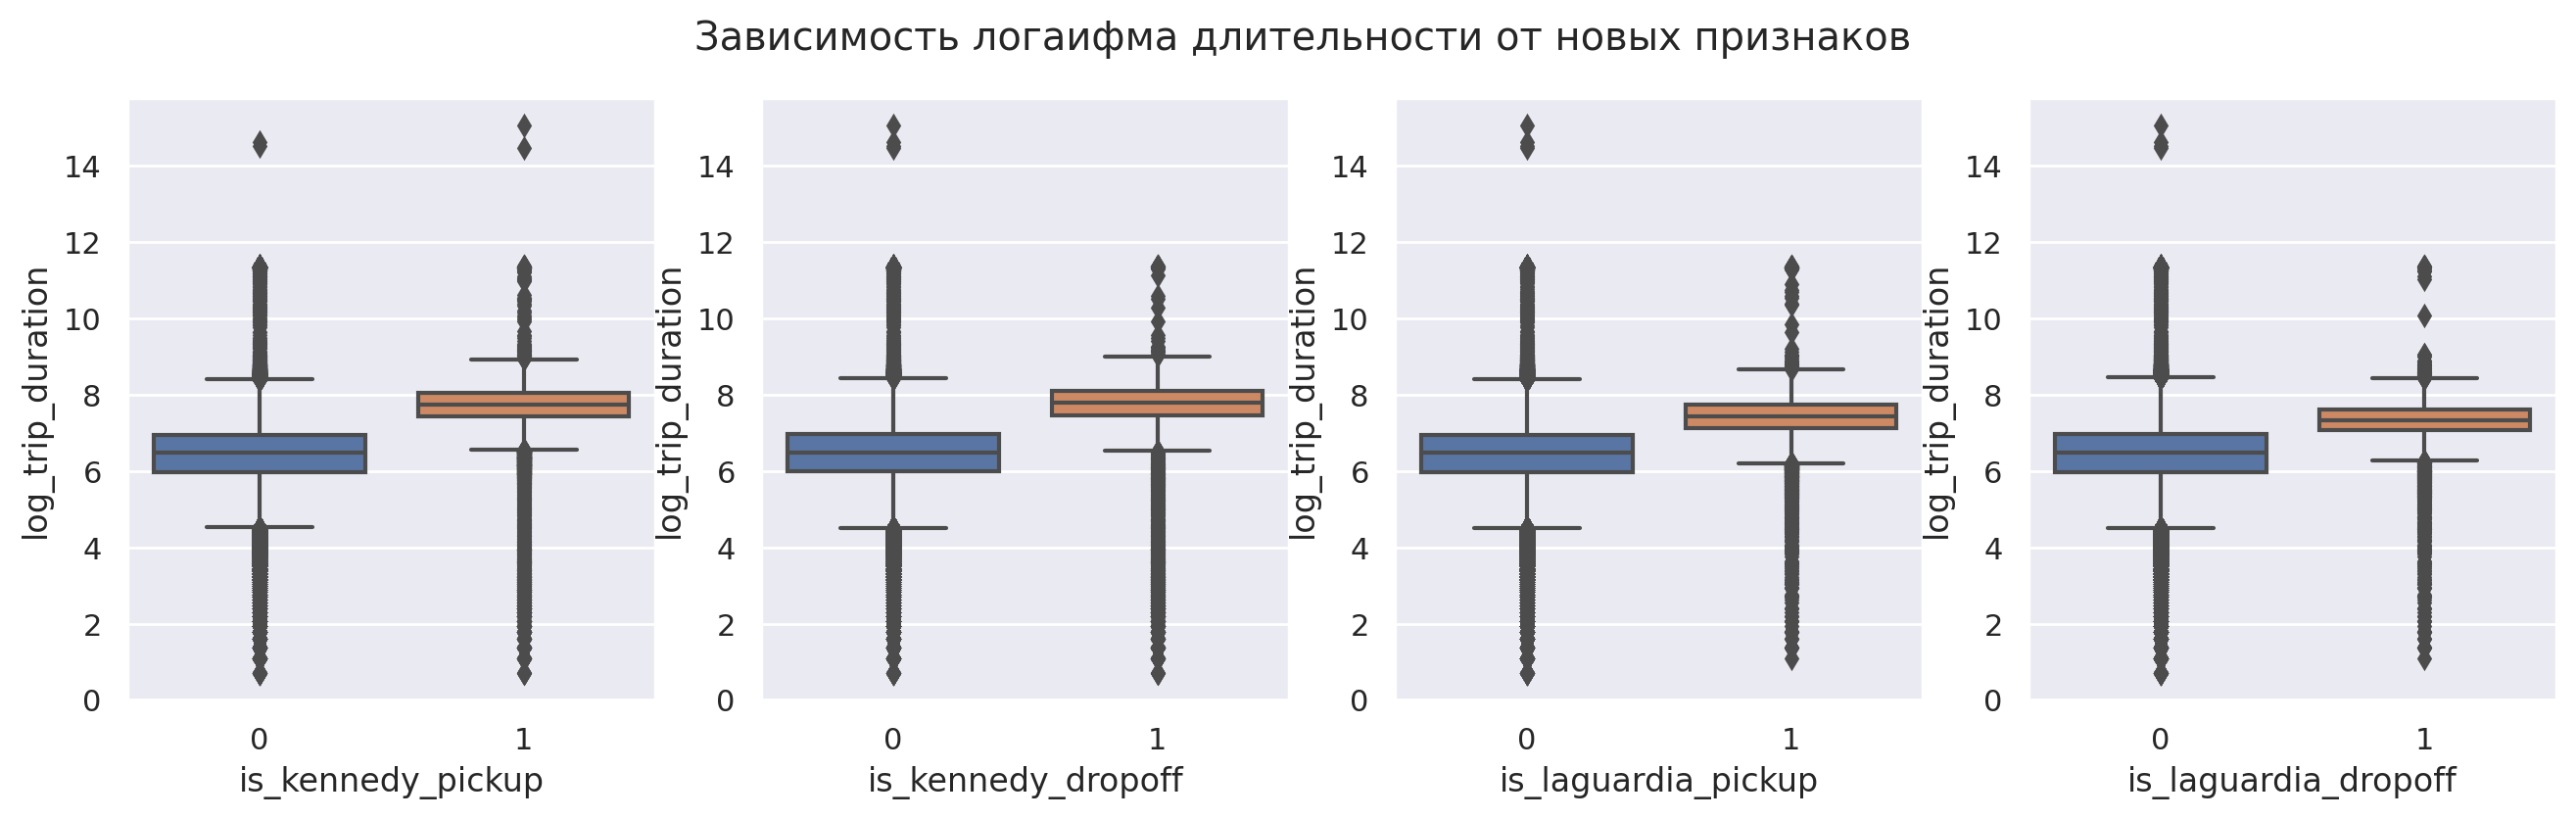

In [264]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

fig, axs = plt.subplots(1, 4, figsize=(16, 4))
fig.suptitle('Зависимость логаифма длительности от новых признаков')


sns.boxplot(data=X_train, x="is_kennedy_pickup", y="log_trip_duration", ax = axs[0])
sns.boxplot(data=X_train, x="is_kennedy_dropoff", y="log_trip_duration", ax = axs[1])
sns.boxplot(data=X_train, x="is_laguardia_pickup", y="log_trip_duration", ax = axs[2])
sns.boxplot(data=X_train, x="is_laguardia_dropoff", y="log_trip_duration", ax = axs[3])

ax.figure.set_size_inches(10, 10)


plt.show()

**Вопрос**: судя по графикам, как вы думаете, хорошими ли получились эти признаки?

Из/в аэропорт по длительность примерна та же поездка, что и без признаков, так что они не сильно повлияют на обучение

<img src="https://www.dropbox.com/s/xson9nukz5hba7c/map.png?raw=1" align="right" width="20%" style="margin-left: 20px; margin-bottom: 20px">

**Задание 9 (1 балл)**. Сейчас мы почти что не используем сами значения координат. На это есть несколько причин: по отдельности рассматривать широту и долготу не имеет особого смысла, стоит рассматривать их вместе. Во-вторых, понятно, что зависимость между нашим таргетом и координатами не линейная. Чтобы как-то использовать координаты, можно прибегнуть к следующему трюку: обрамим область с наибольшим количеством поездок прямоугольником (как на рисунке). Разобьем этот прямоугольник на ячейки. Каждой точке сопоставим номер ее ячейки, а тем точкам, что не попали ни в одну из ячеек, сопоставим значение -1.

Напишите трансформер, который сначала разбивает показанную на рисунке область на ячейки, а затем создает два признака: номер ячейки, в которой началась поездка, и номер ячейки, в которой закончилась поездка. Количество строк и столбцов выберите самостоятельно.

Обратите внимание, что все вычисления должны быть векторизованными, трансформер не должен модифицировать передаваемую ему выборку inplace, а все необходимые статистики (если они вдруг нужны) нужно считать только по обучающей выборке в методе `fit`:

In [265]:
def get_cells(left, right, rows, cols):

    higth = (right[0] - left[0]) / rows
    width = (right[1] - left[1]) / cols

    cels = []
    for i in range(rows):
        for j in range(cols):
            left_x = left[0] + higth * i
            left_y = left[1] + width * j
            right_x = left[0] + higth * (i + 1)
            right_y = left[1] + width * (j + 1)
            cels.append([(left_x, left_y), (right_x, right_y)])

    return cels

In [266]:
from sklearn.base import BaseEstimator, TransformerMixin


# TransformerMixin implements fit_transform for you,
# applying your fit and transform consistently

class MapGridTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, left, right, rows, cols):
        # your code here
        self.rows = rows
        self.cols = cols
        self.cells = get_cells(left, right,rows, cols)
        self.left = left
        self.right = right

    def show_map(self):
        # you may want to visualize cells
        pass

    def fit(self, cell = None, X=None, y=None):
        if not cell:
            cell = [self.left, self.right]
        return (X > cell[0][0]) & (X < cell[1][0]) & (y > cell[0][1]) & (y < cell[1][1])

    def transform(self, X, y=None):
        X['cell_number_pickup'] = -1
        X['cell_number_dropoff'] = -1
        for i in range(len(self.cells)):
            X['cell_number_pickup'] = X['cell_number_pickup'].mask(self.fit(self.cells[i], X['pickup_latitude'], X['pickup_longitude']), i)
            X['cell_number_dropoff'] = X['cell_number_dropoff'].mask(self.fit(self.cells[i], X['dropoff_latitude'], X['dropoff_longitude']), i)
        return X


In [267]:
left = (38.650143, -75.784651)
right = (45.77725, -70.872611)

map_grid_transformer = MapGridTransformer(left, right, 4, 3)
X_train = map_grid_transformer.transform(X_train)
X_test = map_grid_transformer.transform(X_test)

**Задание 10 (0.25 балла)**. Обучите `Ridge`-регрессию со стандартными параметрами на признаках, которые мы выделили к текущему моменту. Категориальные признаки закодируйте через one-hot-кодирование, числовые признаки отмасштабируйте.

In [268]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

categorical = ['is_abnormal_january', 'is_abnormal_may', 'pickup_weekday', 'pickup_month', 'pickup_hour',\
               'pickup_day','cell_number_pickup','cell_number_dropoff', "is_kennedy_pickup",\
               "is_kennedy_dropoff","is_laguardia_pickup", "is_laguardia_dropoff" , "high_traffic", "low_traffic"]
numeric_features = ['log_haversine']

column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown="ignore"), categorical),
    ('scaling', StandardScaler(), numeric_features)
])

pipeline = Pipeline(steps=[
    ('ohe_and_scaling', column_transformer),
    ('regression', Ridge())
])

model = pipeline.fit(X_train[categorical + numeric_features], X_train['log_trip_duration'])
y_pred = model.predict(X_test[categorical + numeric_features])

print("Test RMSE = %.4f" % mean_squared_error(X_test['log_trip_duration'], y_pred, squared=False))

Test RMSE = 0.4876


## Часть 3. Изучаем оставшиеся признаки (1 балл)

**Задание 11 (0.75 баллов)**. У нас осталось еще 3 признака, которые мы не исследовали: `vendor_id`, `passenger_count` и `store_and_fwd_flag`.

**Вопрос**: Подумайте, почему каждый из этих признаков может быть потенциально полезным.

Посчитайте, сколько есть уникальных значений у каждого из этих признаков:

In [269]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
X_train['vendor_id'].value_counts()

2    546566
1    474484
Name: vendor_id, dtype: int64

In [270]:
X_train['passenger_count'].value_counts()

1    723614
2    147429
5     54532
3     41919
6     33707
4     19804
0        41
7         2
8         1
9         1
Name: passenger_count, dtype: int64

In [271]:
X_train['store_and_fwd_flag'].value_counts()

N    1015403
Y       5647
Name: store_and_fwd_flag, dtype: int64

Постройте "ящики с усами" распределений логарифма времени поездки в зависимости от значений каждого из признаков

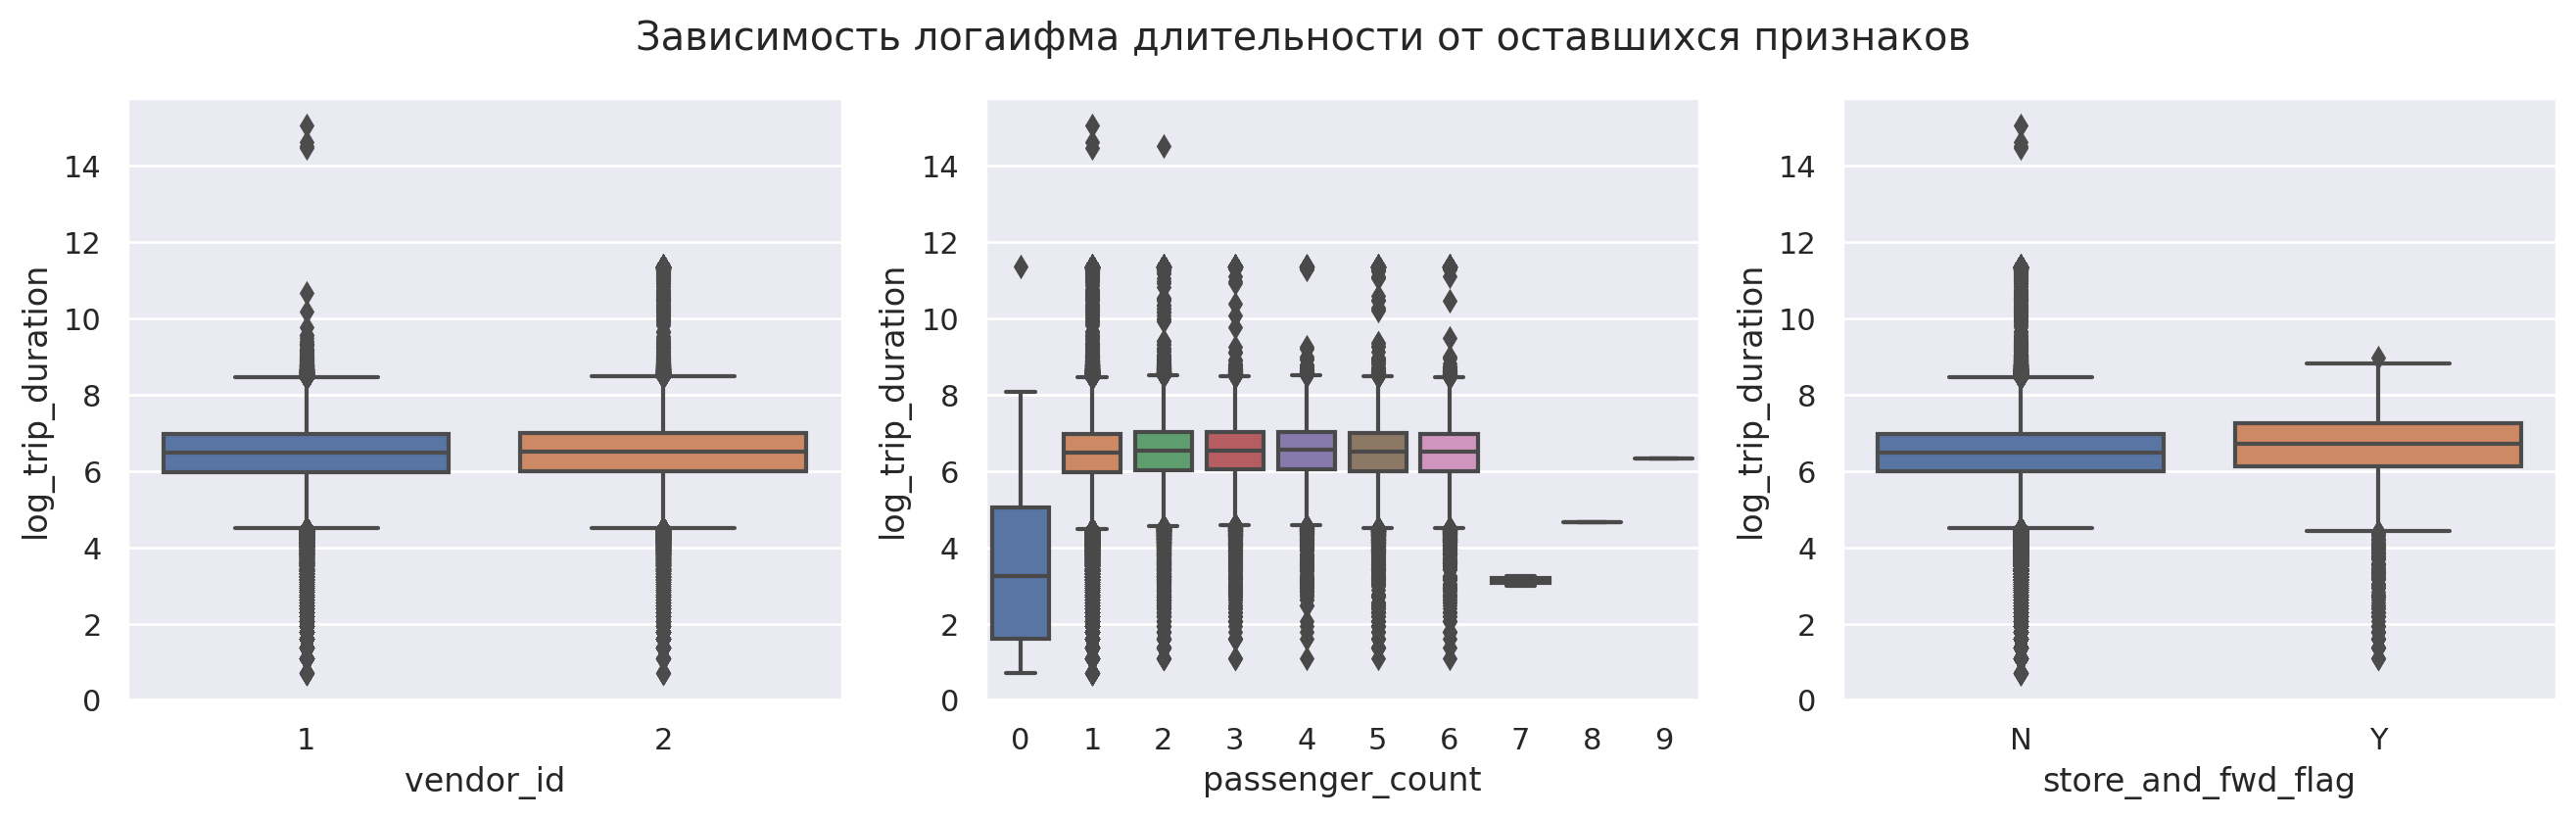

In [272]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
fig, axs = plt.subplots(1, 3, figsize=(16, 4))
fig.suptitle('Зависимость логаифма длительности от оставшихся признаков')


sns.boxplot(data=X_train, x="vendor_id", y="log_trip_duration", ax = axs[0])
sns.boxplot(data=X_train, x="passenger_count", y="log_trip_duration", ax = axs[1])
sns.boxplot(data=X_train, x="store_and_fwd_flag", y="log_trip_duration", ax = axs[2])

ax.figure.set_size_inches(10, 10)


plt.show()

Переведите признаки `vendor_id` и `store_and_fwd_flag` в значения $\{0;1\}$

In [273]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
X_train['vendor_id'] = X_train['vendor_id'] - 1
X_train['store_and_fwd_flag'] = (X_train['store_and_fwd_flag'] == np.full([X_train.shape[0]], 'Y')) * 1

X_test['vendor_id'] = X_test['vendor_id'] - 1
X_test['store_and_fwd_flag'] = (X_test['store_and_fwd_flag'] == np.full([X_test.shape[0]], 'Y')) * 1

In [274]:
X_train['store_and_fwd_flag'].value_counts()

0    1015403
1       5647
Name: store_and_fwd_flag, dtype: int64

In [275]:
X_train['vendor_id'].value_counts()

1    546566
0    474484
Name: vendor_id, dtype: int64

**Вопрос**: Основываясь на графиках выше, как вы думаете, будут ли эти признаки сильными?


**Ответ**: Сильными нет, так как время поездки что с признаком, что без почти такое же, к тому же количество пассажиров может быть 0, а длится поездка не 0

**Задание 12 (0.25 баллов)**. Проверьте свои предположения, обучив модель в том числе и на этих трех признаках. Обучайте `Ridge`-регрессию со стандартными параметрами. Категориальные признаки закодируйте one-hot-кодированием, а численные отмасштабируйте.

In [276]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

categorical = ['is_abnormal_january', 'is_abnormal_may', 'pickup_weekday', 'pickup_month', 'pickup_hour',\
               'pickup_day','cell_number_pickup','cell_number_dropoff', "is_kennedy_pickup",\
               "is_kennedy_dropoff","is_laguardia_pickup", "is_laguardia_dropoff" , "high_traffic", "low_traffic",  'passenger_count', 'vendor_id', 'store_and_fwd_flag' ]
numeric = ['log_haversine']

column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown="ignore"), categorical),
    ('scaling', StandardScaler(), numeric)
])

pipeline = Pipeline(steps=[
    ('ohe_and_scaling', column_transformer),
    ('regression', Ridge())
])

model = pipeline.fit(X_train[categorical + numeric], X_train['log_trip_duration'])
y_pred = model.predict(X_test[categorical + numeric])

print("Test RMSE = %.4f" % mean_squared_error(X_test['log_trip_duration'], y_pred, squared=False))


Test RMSE = 0.4870


Если признаки не дали какого-то ощутимого улучшения метрики, их можно выбросить из данных.

In [277]:
X_train = X_train.drop(['passenger_count', 'vendor_id', 'store_and_fwd_flag' ], axis = 1)
X_test = X_test.drop(['passenger_count', 'vendor_id', 'store_and_fwd_flag' ], axis = 1)

## Часть 4. Улучшаем модель (3 балла)

**Задание 13 (1 балл)**. В наших данных есть нетипичные объекты (выбросы, или outliers): с аномально маленьким времени поездки, с очень большим пройденным расстоянием или очень большими остатками регрессии. В этом задании предлагается исключить такие объекты из обучающей выборки. Для этого нарисуйте гистограммы распределения упомянутых выше величин, выберите объекты, которые можно назвать выбросами, и очистите __обучающую выборку__ от них.

Отметим, что хотя эти объекты и выглядят как выбросы, в тестовой выборке тоже скорее всего будут объекты с такими же странными значениями целевой переменной и/или признаков. Поэтому, возможно, чистка обучающей выборки приведёт к ухудшению качества на тесте. Тем не менее, всё равно лучше удалять выбросы из обучения, чтобы модель получалась более разумной и интерпретируемой.

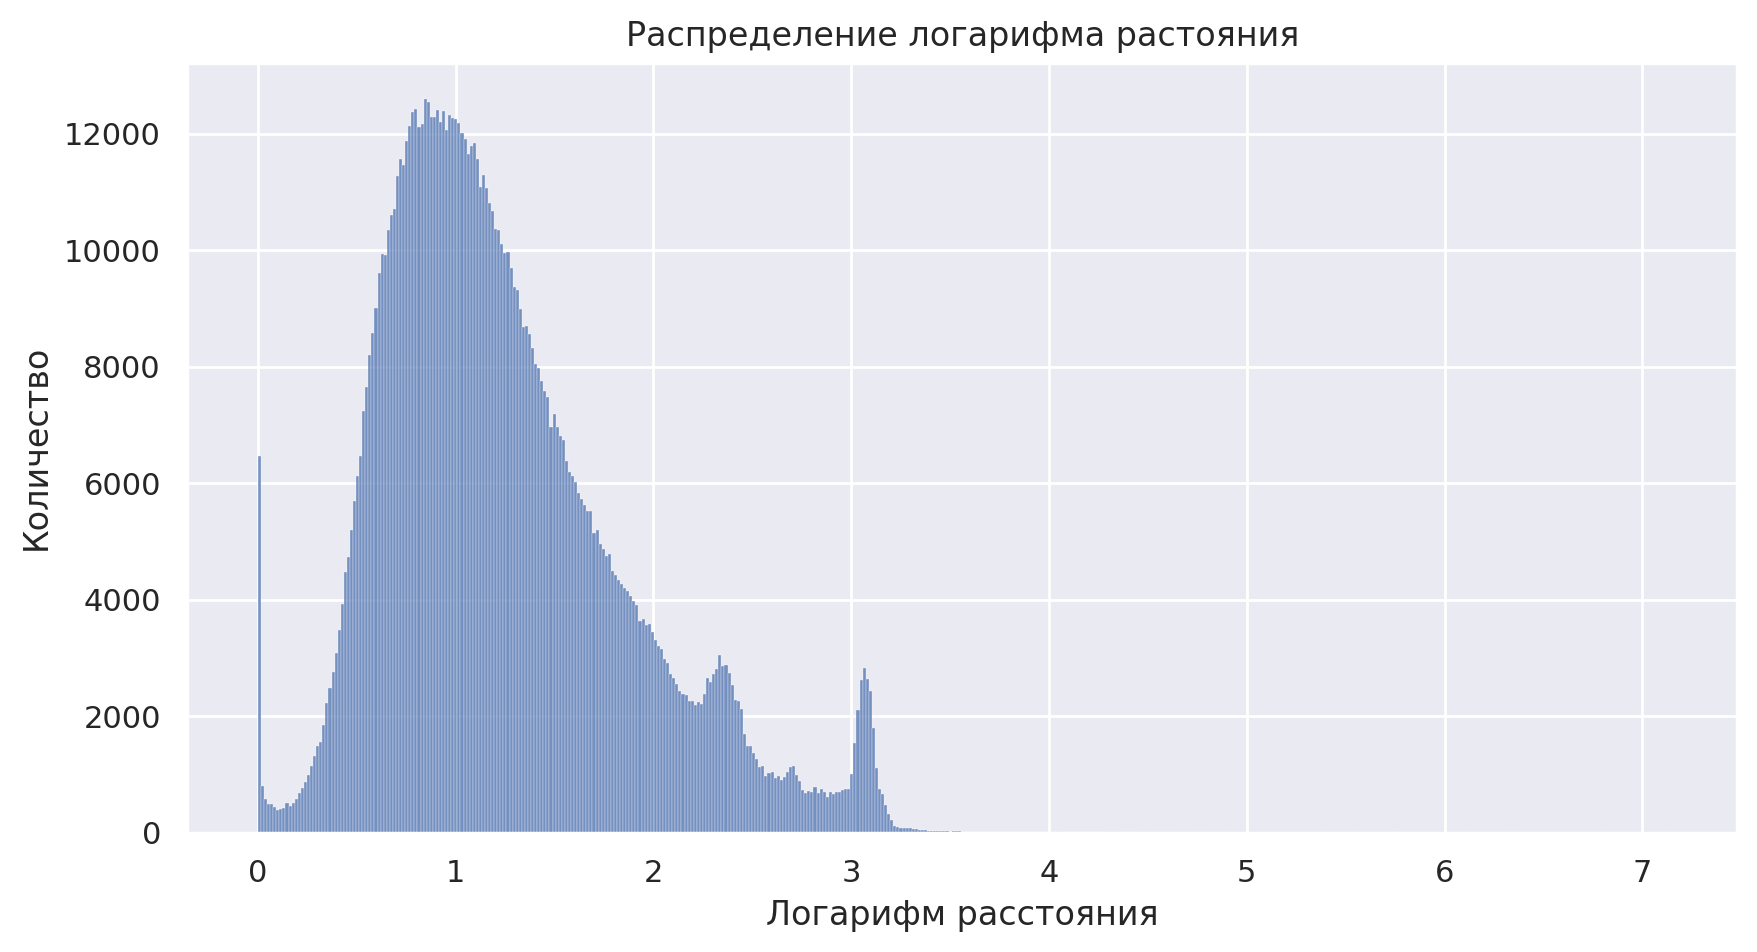

In [278]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

plt.figure(figsize=(10, 5))
sns.histplot(X_train['log_haversine'])

ax.figure.set_size_inches(10, 5)

plt.title("Распределение логарифма растояния")
plt.xlabel("Логарифм расстояния")
plt.ylabel("Количество")
plt.show()


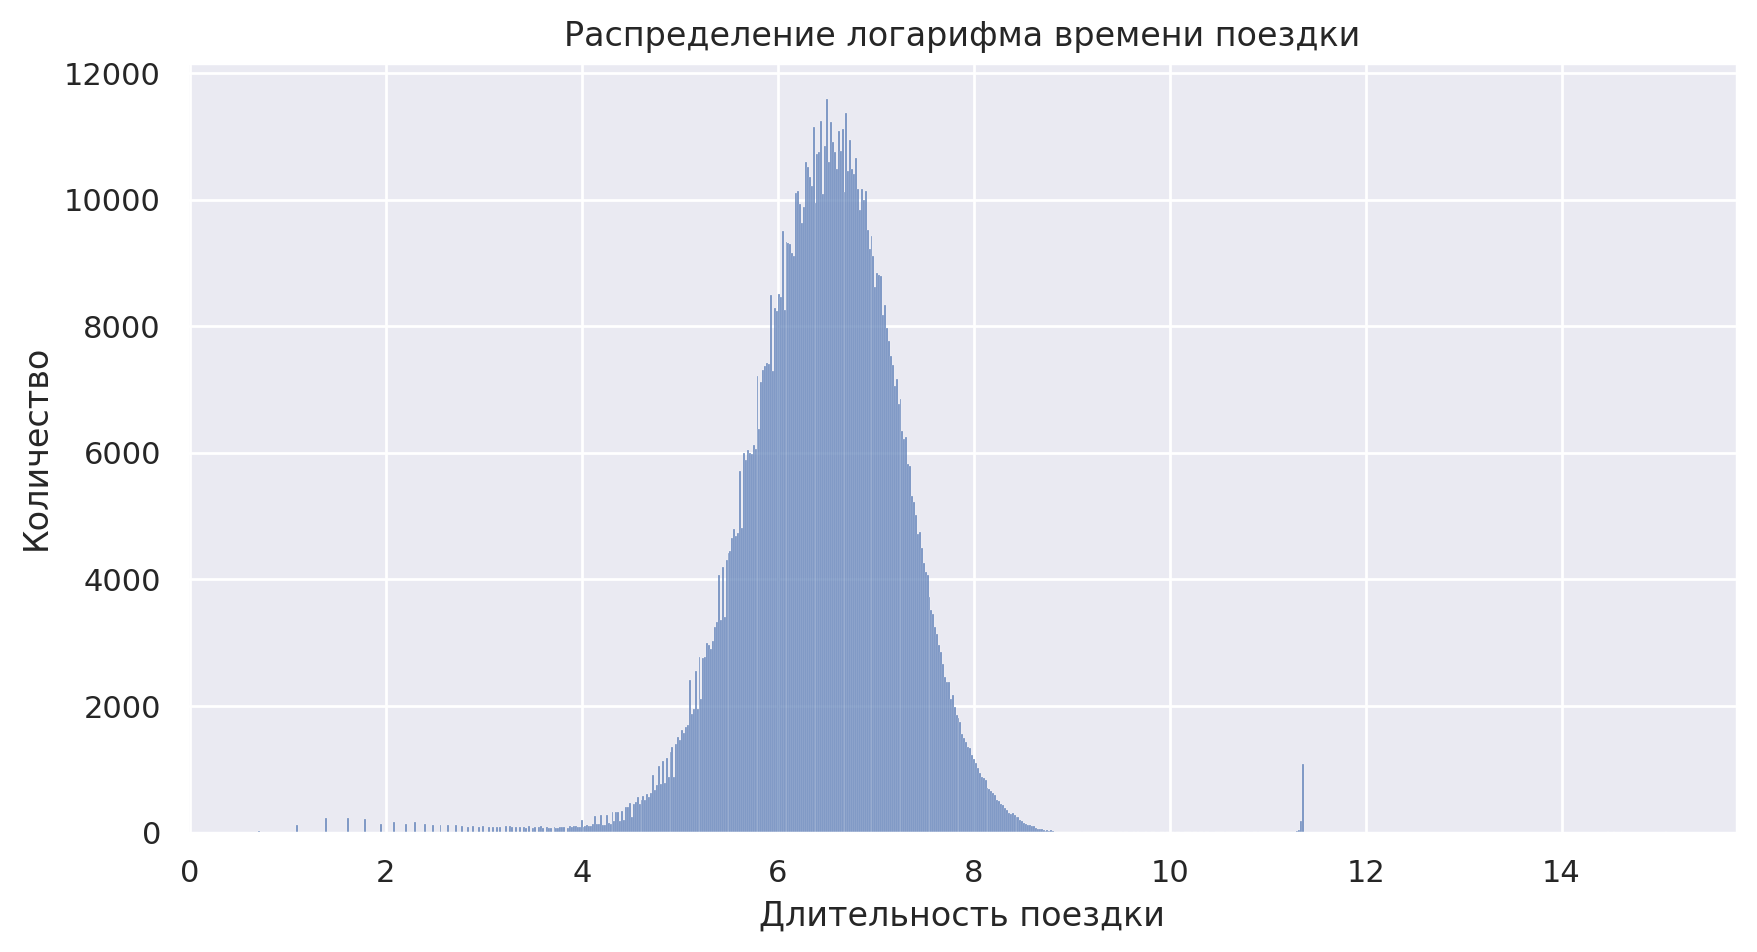

In [279]:
plt.figure(figsize=(10, 5))
sns.histplot(X_train['log_trip_duration'])

ax.figure.set_size_inches(10, 5)

plt.title("Распределение логарифма времени поездки")
plt.xlabel("Длительность поездки")
plt.ylabel("Количество")
plt.show()


In [280]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

categorical = ['is_abnormal_january', 'is_abnormal_may', 'pickup_weekday', 'pickup_month', 'pickup_hour',\
               'pickup_day','cell_number_pickup','cell_number_dropoff', "is_kennedy_pickup",\
               "is_kennedy_dropoff","is_laguardia_pickup", "is_laguardia_dropoff" , "high_traffic", "low_traffic" ]
numeric = ['log_haversine']

column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown="ignore"), categorical),
    ('scaling', StandardScaler(), numeric)
])

pipeline = Pipeline(steps=[
    ('ohe_and_scaling', column_transformer),
    ('regression', Ridge())
])

model = pipeline.fit(X_train[categorical + numeric], X_train['log_trip_duration'])


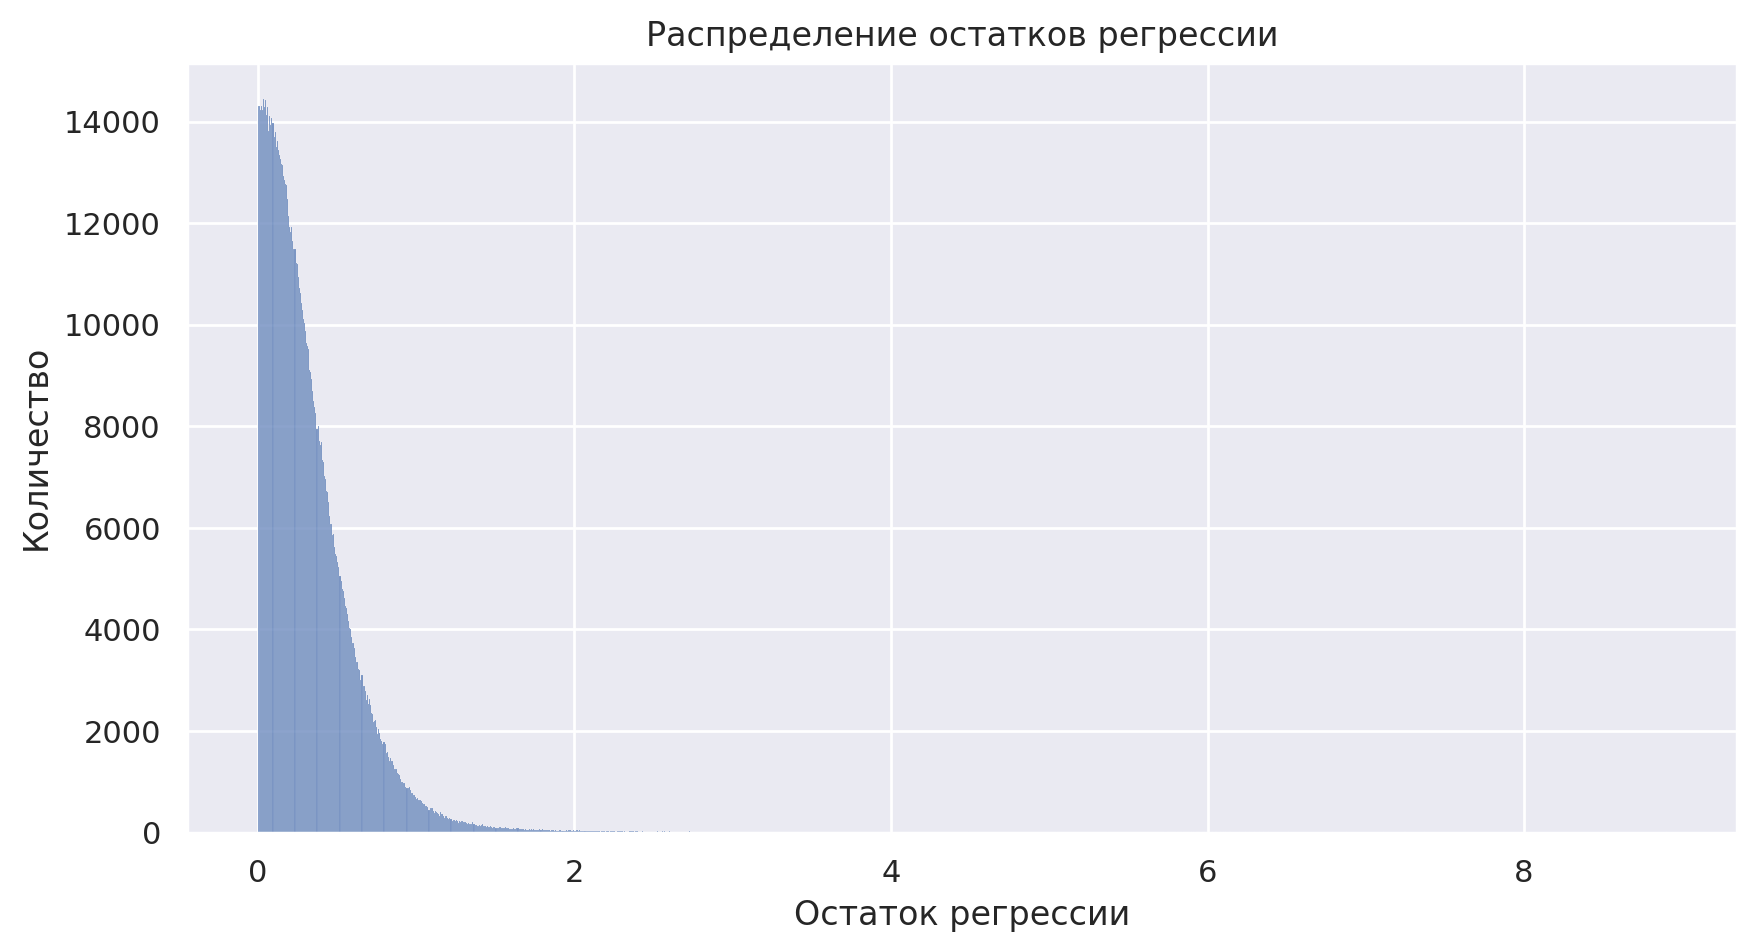

In [281]:
plt.figure(figsize=(10, 5))
y_pred = model.predict(X_train[categorical + numeric])
residual = np.abs(X_train['log_trip_duration'] - y_pred)

sns.histplot(residual)

ax.figure.set_size_inches(10, 5)

plt.title("Распределение остатков регрессии")
plt.xlabel("Остаток регрессии")
plt.ylabel("Количество")
plt.show()

In [282]:
X_train = X_train[residual < 2]
X_train = X_train[X_train['log_trip_duration'] > 4]
X_train = X_train[X_train['log_haversine'] < 3.5]

Сейчас у нас очень много категориальных признаков. В категориальных признаках могут содержаться редкие категории, обычно это плохо: модель сильно переобучается на таких примерах. Для каждого категориального признака объедините действительно редкие категории в одну, если такие имеются (т.е. если категории действительно редкие).

In [283]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

categorical = ['is_abnormal_january', 'is_abnormal_may', 'pickup_weekday', 'pickup_month', 'pickup_hour',\
               'pickup_day','cell_number_pickup','cell_number_dropoff', "is_kennedy_pickup",\
               "is_kennedy_dropoff","is_laguardia_pickup", "is_laguardia_dropoff" , "high_traffic", \
               "low_traffic"]

print("is_abnormal_may :", X_train['is_abnormal_may'].value_counts())
print("is_abnormal_january : ", X_train['is_abnormal_january'].value_counts())
print("is_kennedy_pickup : ", X_train['is_kennedy_pickup'].value_counts())
print("is_kennedy_dropoff : ", X_train['is_kennedy_dropoff'].value_counts())
print("is_laguardia_pickup : ", X_train['is_laguardia_pickup'].value_counts())
print("is_laguardia_dropoff : ", X_train['is_laguardia_dropoff'].value_counts())
print("high_traffic : ", X_train['high_traffic'].value_counts())
print("low_traffic : ", X_train['low_traffic'].value_counts())



is_abnormal_may : 0    1004257
1       8324
Name: is_abnormal_may, dtype: int64
is_abnormal_january :  0    1004837
1       7744
Name: is_abnormal_january, dtype: int64
is_kennedy_pickup :  0    991502
1     21079
Name: is_kennedy_pickup, dtype: int64
is_kennedy_dropoff :  0    1004920
1       7661
Name: is_kennedy_dropoff, dtype: int64
is_laguardia_pickup :  0    988196
1     24385
Name: is_laguardia_pickup, dtype: int64
is_laguardia_dropoff :  0    1002606
1       9975
Name: is_laguardia_dropoff, dtype: int64
high_traffic :  0    688691
1    323890
Name: high_traffic, dtype: int64
low_traffic :  0    995544
1     17037
Name: low_traffic, dtype: int64


Можно объединить аномальные дни в один день, эти категории редкие.
Аэропорты сами по себе не редкие, про трафик так же. Категории дня недели, дня в году и часа точно не редкие, их не стоит объединять

In [284]:
def concatinate_abnormal(df):
    df['is_abnormal'] = df['is_abnormal_may'] | df['is_abnormal_january']
    df = df.drop(['is_abnormal_may','is_abnormal_january'], axis = 1)

concatinate_abnormal(X_train)
concatinate_abnormal(X_test)

<ipython-input-284-0e1872275817>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['is_abnormal'] = df['is_abnormal_may'] | df['is_abnormal_january']


Обучите модель на очищенных данных и посчитайте качество на тестовой выборке.

In [285]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
categorical = ['is_abnormal', 'pickup_weekday', 'pickup_month', 'pickup_hour',\
               'pickup_day','cell_number_pickup','cell_number_dropoff', "is_kennedy_pickup",\
               "is_kennedy_dropoff","is_laguardia_pickup", "is_laguardia_dropoff" , "high_traffic", \
               "low_traffic"]

numeric = ['log_haversine']

column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown="ignore"), categorical),
    ('scaling', StandardScaler(), numeric)
])

pipeline = Pipeline(steps=[
    ('ohe_and_scaling', column_transformer),
    ('regression', Ridge())
])

model = pipeline.fit(X_train[categorical + numeric], X_train['log_trip_duration'])
y_pred = model.predict(X_test[categorical + numeric])

print("Test RMSE = %.4f" % mean_squared_error(X_test['log_trip_duration'], y_pred, squared=False))


Test RMSE = 0.4881


**Задание 14 (1 балл)**. После OneHot-кодирования количество признаков в нашем датасете сильно возрастает. Посчитайте колиество признаков до и после кодирования категориальных признаков.

In [286]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
print("Size before OneHot:", len(categorical + numeric))
print("Size after OneHot:", column_transformer.transform(X_train).shape[1])


Size before OneHot: 14
Size after OneHot: 244


Попробуйте обучить не `Ridge`-, а `Lasso`-регрессию. Какой метод лучше?

In [287]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
from sklearn.linear_model import Lasso

categorical = ['is_abnormal', 'pickup_weekday', 'pickup_month', 'pickup_hour',\
               'pickup_day','cell_number_pickup','cell_number_dropoff', "is_kennedy_pickup",\
               "is_kennedy_dropoff","is_laguardia_pickup", "is_laguardia_dropoff" , "high_traffic", \
               "low_traffic"]

numeric = ['log_haversine']

column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown="ignore"), categorical),
    ('scaling', StandardScaler(), numeric)
])

lasso_pipeline = Pipeline(steps=[
    ('ohe_and_scaling', column_transformer),
    ('regression', Lasso())
])

model = lasso_pipeline.fit(X_train[categorical + numeric], X_train['log_trip_duration'])
y_pred = model.predict(X_test[categorical + numeric])
print("RMSE = %.4f" % mean_squared_error(X_test['log_trip_duration'], y_pred, squared=False))

RMSE = 0.7951


Ridge сильно лучше

Разбейте _обучающую выборку_ на обучающую и валидационную в отношении 8:2. По валидационной выборке подберите оптимальные значения параметра регуляризации (по логарифмической сетке) для `Ridge` и `Lasso`, на тестовой выборке измерьте качество лучшей полученной модели.

In [288]:
from sklearn.linear_model import Lasso

categorical = ['is_abnormal', 'pickup_weekday', 'pickup_month', 'pickup_hour',\
               'pickup_day','cell_number_pickup','cell_number_dropoff', "is_kennedy_pickup",\
               "is_kennedy_dropoff","is_laguardia_pickup", "is_laguardia_dropoff" , "high_traffic", \
               "low_traffic"]

numeric = ['log_haversine']

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Test RMSE = 0.4882
Best alpha = 3.5938


Text(0, 0.5, 'CV score')

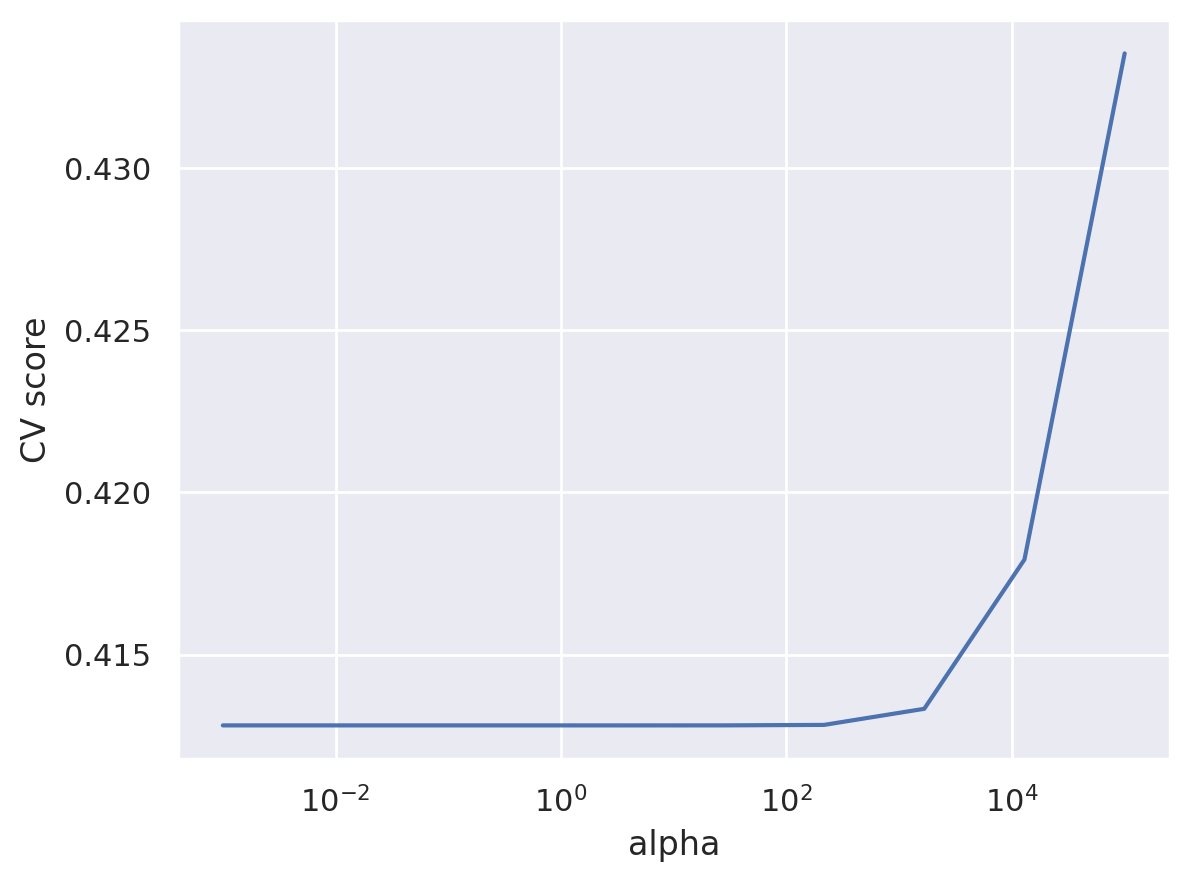

In [289]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
from sklearn.model_selection import GridSearchCV

alphas = np.logspace(-3, 5, 10)

ridge_pipeline = Pipeline(steps=[
    ('ohe_and_scaling', column_transformer),
    ('regression', Ridge())
])


searcher = GridSearchCV(ridge_pipeline, [{"regression__alpha": alphas}],
                        scoring="neg_root_mean_squared_error", cv=5, n_jobs=-1, verbose=3)

model = searcher.fit(X_train[categorical + numeric], X_train['log_trip_duration'])
y_pred = model.predict(X_test[categorical + numeric])

best_alpha = searcher.best_params_["regression__alpha"]

print("Test RMSE = %.4f" % mean_squared_error(X_test['log_trip_duration'], y_pred, squared=False))
print("Best alpha = %.4f" % best_alpha)

plt.plot(alphas, -searcher.cv_results_["mean_test_score"])
plt.xscale("log")
plt.xlabel("alpha")
plt.ylabel("CV score")

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Test RMSE = 0.5104
Best alpha = 0.0100


Text(0, 0.5, 'CV score')

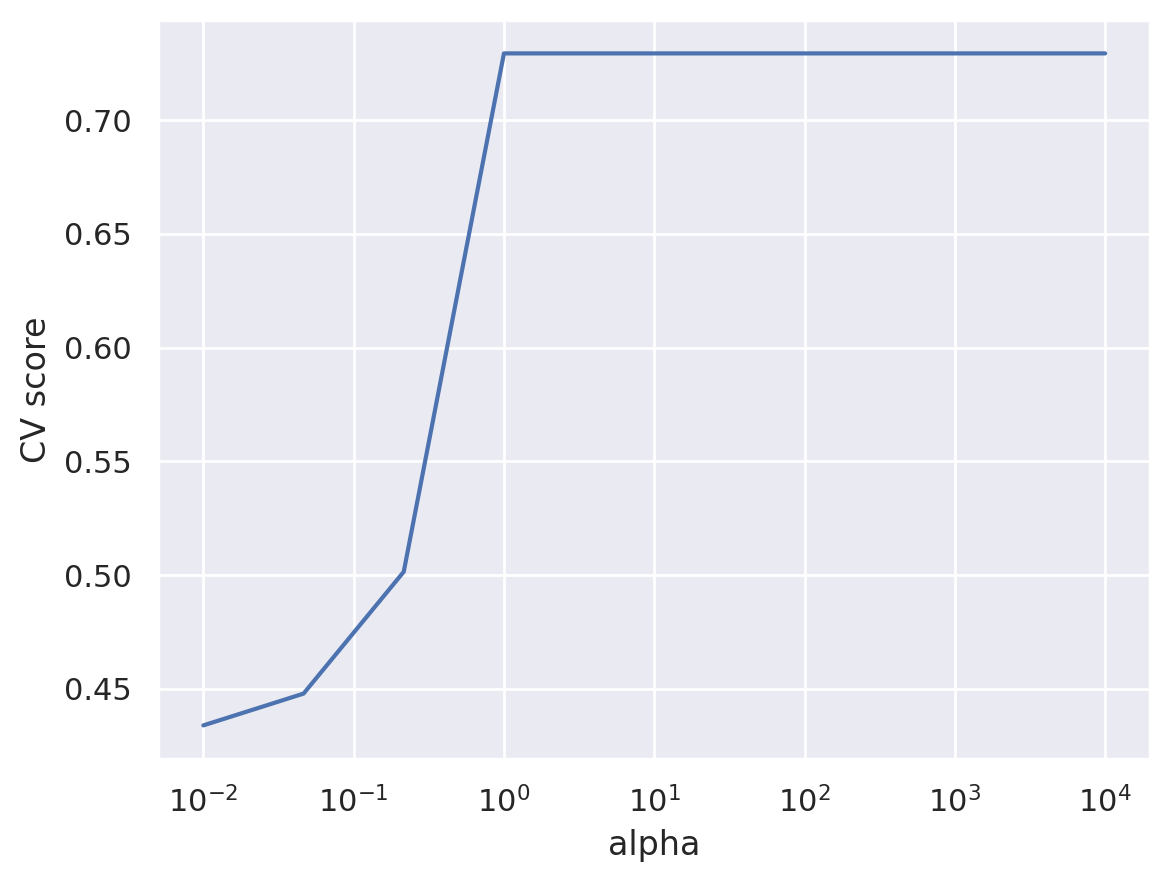

In [290]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
from sklearn.model_selection import GridSearchCV

alphas = np.logspace(-2, 4, 10)

lasso_pipeline = Pipeline(steps=[
    ('ohe_and_scaling', column_transformer),
    ('regression', Lasso())
])


searcher = GridSearchCV(lasso_pipeline, [{"regression__alpha": alphas}],
                        scoring="neg_root_mean_squared_error", cv=5, n_jobs=-1, verbose=3)

model = searcher.fit(X_train[categorical + numeric], X_train['log_trip_duration'])
y_pred = model.predict(X_test[categorical + numeric])

best_alpha = searcher.best_params_["regression__alpha"]

print("Test RMSE = %.4f" % mean_squared_error(X_test['log_trip_duration'], y_pred, squared=False))
print("Best alpha = %.4f" % best_alpha)

plt.plot(alphas, -searcher.cv_results_["mean_test_score"])
plt.xscale("log")
plt.xlabel("alpha")
plt.ylabel("CV score")

Для каждого перебранного `alpha` для Lasso посчитайте количество нулевых весов в модели и нарисуйте график зависимости его от `alpha`. Как сильно придётся потерять в качестве, если мы хотим с помощью Lasso избавиться хотя бы от половины признаков?

In [291]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
categorical = ['is_abnormal', 'pickup_weekday', 'pickup_month', 'pickup_hour',\
               'pickup_day','cell_number_pickup','cell_number_dropoff', "is_kennedy_pickup",\
               "is_kennedy_dropoff","is_laguardia_pickup", "is_laguardia_dropoff" , "high_traffic", \
               "low_traffic"]

numeric = ['log_haversine']

lasso_zeros = []

for alpha in alphas:
    lasso_pipeline = Pipeline(steps=[
    ('ohe_and_scaling', column_transformer),
    ('regression', Lasso(alpha))
  ])

    model = lasso_pipeline.fit(X_train[categorical + numeric], X_train['log_trip_duration'])

    lasso_zeros.append(np.sum(model[-1].coef_ == 0))

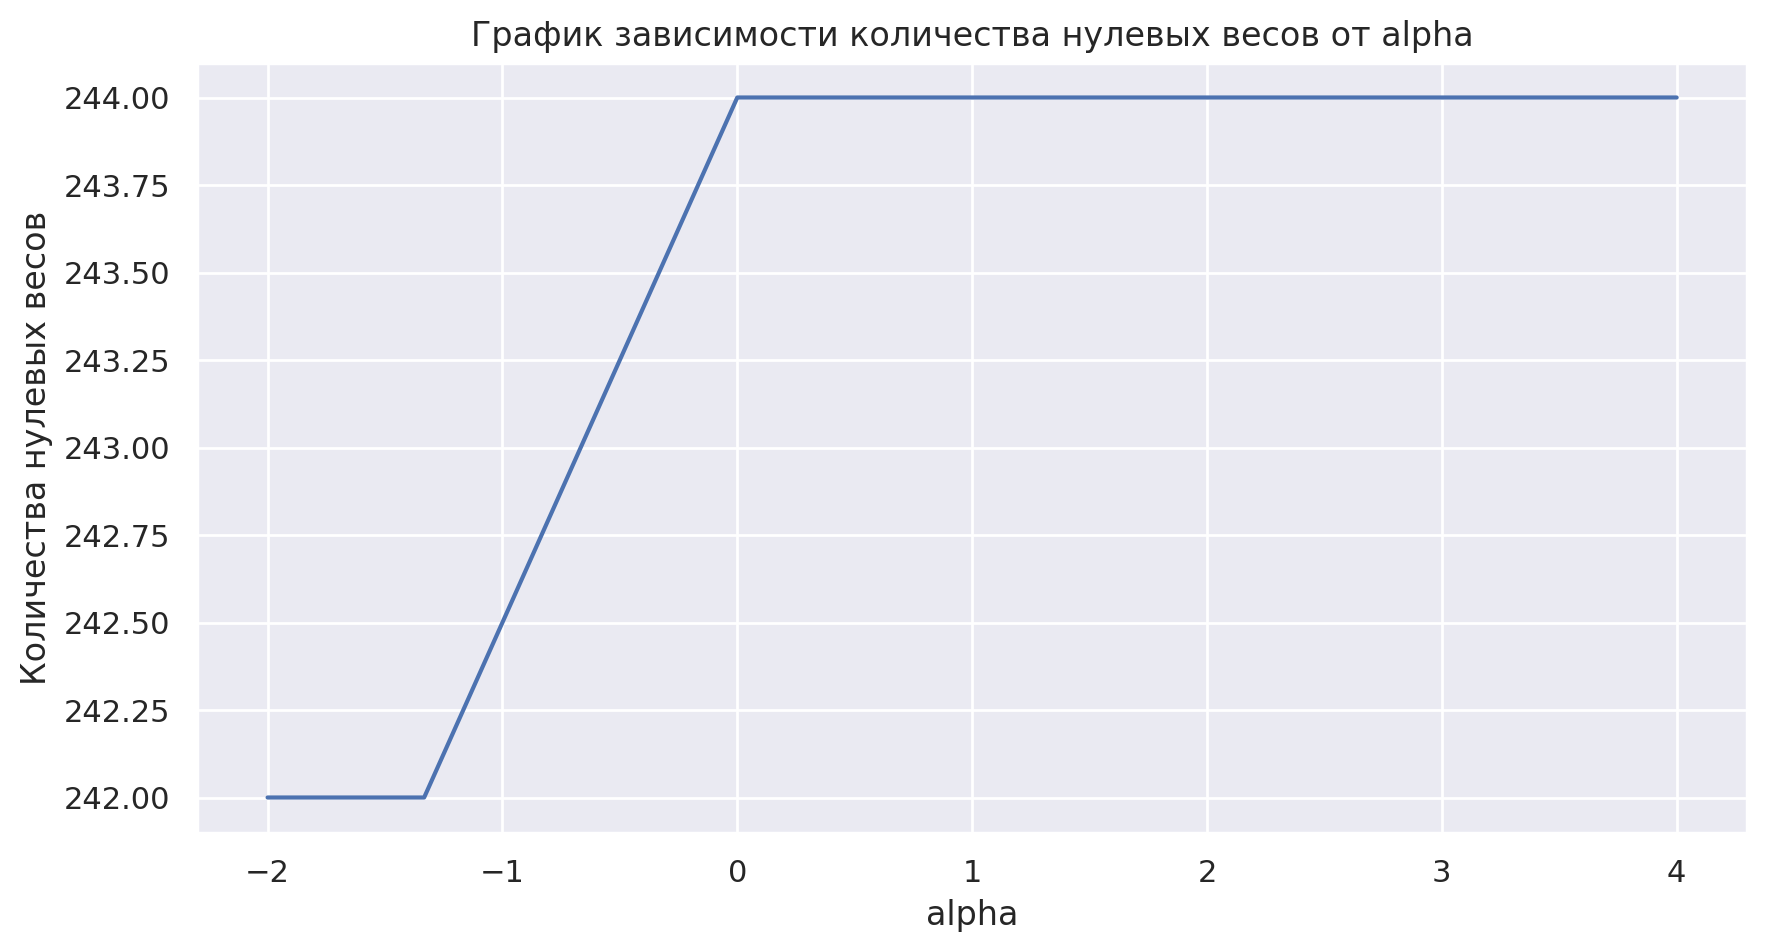

In [293]:
plt.figure(figsize=(10, 5))
plt.plot(np.log10(alphas), lasso_zeros)

plt.title("График зависимости количества нулевых весов от alpha")
plt.xlabel("alpha")
plt.ylabel("Количества нулевых весов")
plt.show()

Ошибка увеличится на около 0, 3

<img src="https://www.dropbox.com/s/wp4jj0599np17lh/map_direction.png?raw=1" width="20%" align="right" style="margin-left: 20px">

**Задание 15 (1 балл)**. Часто бывает полезным использовать взаимодействия признаков (feature interactions), то есть строить новые признаки на основе уже существующих. Выше мы разбили карту Манхэттена на ячейки и придумали признаки "из какой ячейки началась поездка" и "в какой ячейке закончилась поездка".

Давайте попробуем сделать следующее: посчитаем, сколько раз встречается каждая возможная пара этих признаков в нашем датасете и выберем 100 самых частых пар. Закодируем поездки с этими частыми парами как категориальный признак, остальным объектам припишем -1. Получается, что мы закодировали, откуда и куда должно было ехать такси.

Также можете придумать ещё какой-нибудь способ сделать признаки про маршрут. Если эти признаки будут давать хороший прирост в качестве, то за это могут быть даны дополнительные бонусные баллы.

**Вопрос**: Почему такой признак потенциально полезный? Почему линейная модель не может самостоятельно "вытащить" эту информацию, ведь у нее в распоряжении есть признаки "из какой ячейки началась поездка" и "в какой ячейке закончилась поездка"?

Поездки по популярному маршруту способствуют пробкам, поэтому время поездки увеличивается

In [214]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
copy_data = X_train[['cell_number_pickup', 'cell_number_dropoff', 'id']].copy()
popular_pairs = copy_data.groupby(['cell_number_pickup', 'cell_number_dropoff']).agg({'id':'count'}).reset_index()
popular_pairs = popular_pairs.sort_values(by = 'id', ascending=False)[:100]


In [215]:
def add_criteria_popular_cell(df):
    df['popularr_cell'] = -1
    for index in popular_pairs.index:
      df['popularr_cell'] = df['popularr_cell'].mask((df['cell_number_pickup'] == popular_pairs.loc[index, 'cell_number_pickup']) &\
                                                     (df['cell_number_dropoff'] == popular_pairs.loc[index, 'cell_number_dropoff']), index)


add_criteria_popular_cell(X_train)
add_criteria_popular_cell(X_test)


Заново обучите модель (`Ridge`, если она дала более высокое качество в предыдущих экспериментах, и `Lasso` иначе) на новых даннных и посчитайте качество на тестовой выборке

In [216]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

categorical = ['is_abnormal_january', 'is_abnormal_may', 'pickup_weekday', 'pickup_month', 'pickup_hour',\
               'pickup_day','cell_number_pickup','cell_number_dropoff', "is_kennedy_pickup",\
               "is_kennedy_dropoff","is_laguardia_pickup", "is_laguardia_dropoff" , "high_traffic", "low_traffic", \
               'popularr_cell']
numeric_features = ['log_haversine']

column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown="ignore"), categorical),
    ('scaling', StandardScaler(), numeric_features)
])

pipeline = Pipeline(steps=[
    ('ohe_and_scaling', column_transformer),
    ('regression', Ridge())
])

model = pipeline.fit(X_train[categorical + numeric_features], X_train['log_trip_duration'])
y_pred = model.predict(X_test[categorical + numeric_features])

print("Test RMSE = %.4f" % mean_squared_error(X_test['log_trip_duration'], y_pred, squared=False))

Test RMSE = 0.4881


**Задание 16 (бонус, 1 балл)**. Где, как не для нашей задачи, считать манхэттенское расстояние?

**Вопрос**: Найдите, что такое манхэттенское расстояние и почему оно так называется. Как оно нам может помочь?

Введите систему координат на нашей карте так, чтобы оси были параллельны улицам Манхэттена, и добавьте сначала в данные признак "манхэттенское расстояние между пунктом отправления и пунктом назначения", а затем и логарифм этого признака. Посчитайте корреляцию между вашим новыми признаком и таргетом; между `log_haversine` и таргетом. В каком случае корреляция больше?

Нарисуйте карту, где покажете выбранные оси. Чтобы мы могли проверить вашу работу, просьба сделать скрин этой карты и приложить картинку (если мы откроем ваш ноутбук, виджеты отображаться не будут).

In [ ]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

Заново обучите модель на новых даннных и посчитайте качество на тестовой выборке. Стало ли лучше? Объясните полученный результат.

In [ ]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

**Задание 17 (бонус, 2 балла)**. Реализуйте трансформер, который строит разбиение карты по шестигранной решётке с помощью библиотеки [H3](https://github.com/uber/h3-py) и вычисляет признаки на основе такого разбиения.

Признаки могут быть самые разные: расстояние между точкой старта и финиша, посчитанное в количестве шестиугольников; статистика по числу поездок и по их продолжительности в соседних шестиугольниках.

Важно: производительность библиотеки существенно зависит от количества шестиугольников на карте (определяется параметром resolution). Подберите такое разрешение, при котором ваш код будет работать за приемлемое время.

При построении признаков старайтесь не допустить утечки целевой переменной (подробнее про это можно почитать в материалах 1-го семинара) — в противном случае хорошего качества на тестовой выборке достичь не получится.

Измерьте качество после добавления новых признаков. За улучшение функционала ошибки на каждые 0.005 на тестовой выборке будет даваться 0.5 бонусных балла. Можно получить до 2 бонусных баллов за это задание.

In [ ]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

Вставьте картинку, описывающую ваш опыт выполнения этого ДЗ.